In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage

In [2]:
# Load CSV files\
df_data = pd.read_csv('pandas/df_data.csv', low_memory=False)
df_filtered = pd.read_csv('pandas/df_filtered.csv')

agg_df = pd.read_csv('pandas/agg_df_cluster.csv')
fish_df = pd.read_csv('pandas/fish_df_cluster.csv')
agg_df_large = pd.read_csv('pandas/agg_df_large_cluster.csv')
fish_df_large = pd.read_csv('pandas/fish_df_large_cluster.csv')

In [3]:
# designate which clustering to analyze
df_explore = agg_df_large # or agg_df_large
fish_explore = fish_df_large # or fish_df_large


Cluster sizes:
cluster
1     1251
2      690
3       40
4       35
5       33
6       29
7       20
8       10
9        8
10       6
11       4
12       3
13       2
14       2
15       1
16       1
dtype: int64


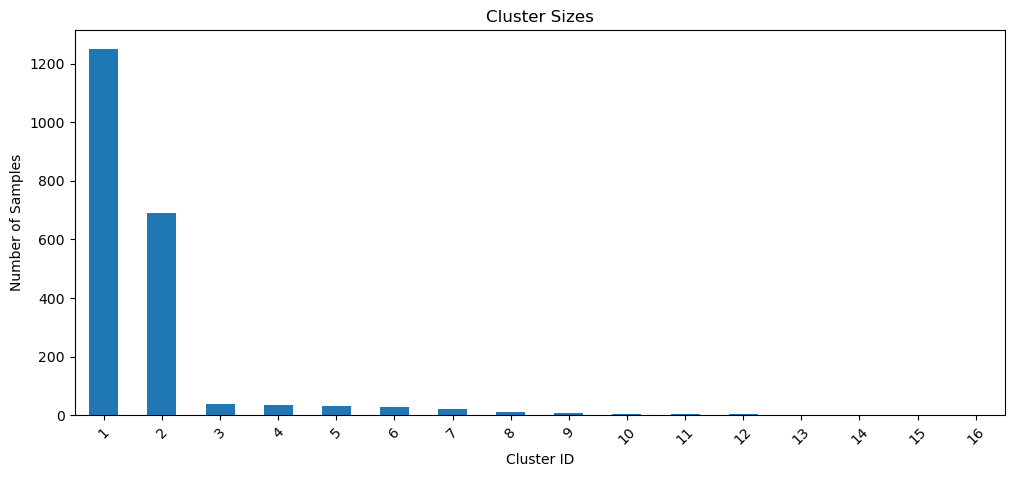

In [4]:
# Summary of clusters
cluster_summary = df_explore.groupby('cluster').size().sort_values(ascending=False)
print(f"\nCluster sizes:")
print(cluster_summary.head(30))

# Visualize cluster size distribution
plt.figure(figsize=(12, 5))
cluster_summary.plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Samples')
plt.title('Cluster Sizes')
plt.xticks(rotation=45);
#print(agg_df.groupby('cluster').size())

In [5]:
# Specify cluster to analyze
cluster_num = 1

# Filter data for this cluster
cluster_data = df_explore[df_explore['cluster'] == cluster_num]
cluster_fish_data = df_filtered[df_filtered['barcode'].isin(cluster_data['barcode'])]

# Environmental variables summary (median)
env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
env_summary = cluster_data[env_vars].median()

# Categorical variables summary (mode)
cat_vars = ['mode_substrt']
cat_summary = cluster_data[cat_vars].mode().iloc[0]

# Binary variables summary (proportion present)
binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
binary_summary = cluster_data[binary_vars].mean()

# Fish species counts
fish_in_cluster = fish_explore[df_explore['cluster'] == cluster_num].drop(columns=['cluster'])
species_counts = fish_in_cluster.sum().sort_values(ascending=False)
species_counts = species_counts[species_counts > 0]

cluster_barcodes = df_explore[df_explore['cluster'] == cluster_num]['barcode']

# Total individuals caught
fish_abundance = df_filtered[df_filtered['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
#fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

# Number of samples where present
fish_occurrence = fish_in_cluster.sum()

# Combine
species_summary = pd.DataFrame({
    'total_caught': fish_abundance,
    'samples': fish_occurrence,
    'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
}).fillna(0).astype({'total_caught': int, 'samples': int})
species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)

# Print summary
print(f"=== CLUSTER {cluster_num} SUMMARY ===")
print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
print("\n--- Environmental Variables (Median) ---")
print(env_summary)
print("\n--- Categorical Variables (Mode) ---")
print(cat_summary)
print("\n--- Binary Variables (Proportion Present) ---")
print(binary_summary)
print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
print(species_summary)

=== CLUSTER 1 SUMMARY ===

Total samples (identified by barcode): 1251

--- Environmental Variables (Median) ---
median_temp        15.20
median_depth        1.10
median_current      0.11
median_esveg92      0.00
median_cond       395.00
dtype: float64

--- Categorical Variables (Mode) ---
mode_substrt    3.0
Name: 0, dtype: float64

--- Binary Variables (Proportion Present) ---
snag_present       0.706496
riprap_present     0.186047
inout_present      0.054531
flooded_present    0.116279
dtype: float64

--- Fish Species (Count of 1251 samples) ---
      total_caught  samples  mean_length
LMBS          9987     1066        189.4
BLGL          9910     1048         97.5
ERSN          4487     1027         51.9
CARP          6252      865        544.6
SHRH          3385      821        298.8
...            ...      ...          ...
BSDR             1        1         40.0
STCT             1        1        117.0
BNDR             1        1         41.0
PDFH             1        1       1

In [6]:
# Summarize all clusters at once
for cluster_num in sorted(df_explore['cluster'].unique()):
    cluster_data = df_explore[df_explore['cluster'] == cluster_num]
    cluster_fish_data = df_data[df_data['barcode'].isin(cluster_data['barcode'])]
    
    # Environmental variables summary (median)
    env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
    env_summary = cluster_data[env_vars].median()

    # Categorical variables summary (mode)
    cat_vars = ['mode_substrt']
    cat_summary = cluster_data[cat_vars].mode().iloc[0]

    # Binary variables summary (proportion present)
    binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
    binary_summary = cluster_data[binary_vars].mean()

    # Fish species counts
    fish_in_cluster = fish_explore[df_explore['cluster'] == cluster_num].drop(columns=['cluster'])
    species_counts = fish_in_cluster.sum().sort_values(ascending=False)
    species_counts = species_counts[species_counts > 0]

    cluster_barcodes = df_explore[df_explore['cluster'] == cluster_num]['barcode']

    # Total individuals caught
    fish_abundance = df_filtered[df_filtered['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
    fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
    #fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

    # Number of samples where present
    fish_occurrence = fish_in_cluster.sum()

    # Combine
    species_summary = pd.DataFrame({
        'total_caught': fish_abundance,
        'samples': fish_occurrence,
        'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
    }).fillna(0).astype({'total_caught': int, 'samples': int})
    species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)


    # Print summary
    print(f"=== CLUSTER {cluster_num} SUMMARY ===")
    print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
    print("\n--- Environmental Variables (Median) ---")
    print(env_summary)
    print("\n--- Categorical Variables (Mode) ---")
    print(cat_summary)
    print("\n--- Binary Variables (Proportion Present) ---")
    print(binary_summary)
    print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
    print(species_summary)

=== CLUSTER 1 SUMMARY ===

Total samples (identified by barcode): 1251

--- Environmental Variables (Median) ---
median_temp        15.20
median_depth        1.10
median_current      0.11
median_esveg92      0.00
median_cond       395.00
dtype: float64

--- Categorical Variables (Mode) ---
mode_substrt    3.0
Name: 0, dtype: float64

--- Binary Variables (Proportion Present) ---
snag_present       0.706496
riprap_present     0.186047
inout_present      0.054531
flooded_present    0.116279
dtype: float64

--- Fish Species (Count of 1251 samples) ---
      total_caught  samples  mean_length
LMBS          9987     1066        189.4
BLGL          9910     1048         97.5
ERSN          4487     1027         51.9
CARP          6252      865        544.6
SHRH          3385      821        298.8
...            ...      ...          ...
BSDR             1        1         40.0
STCT             1        1        117.0
BNDR             1        1         41.0
PDFH             1        1       1

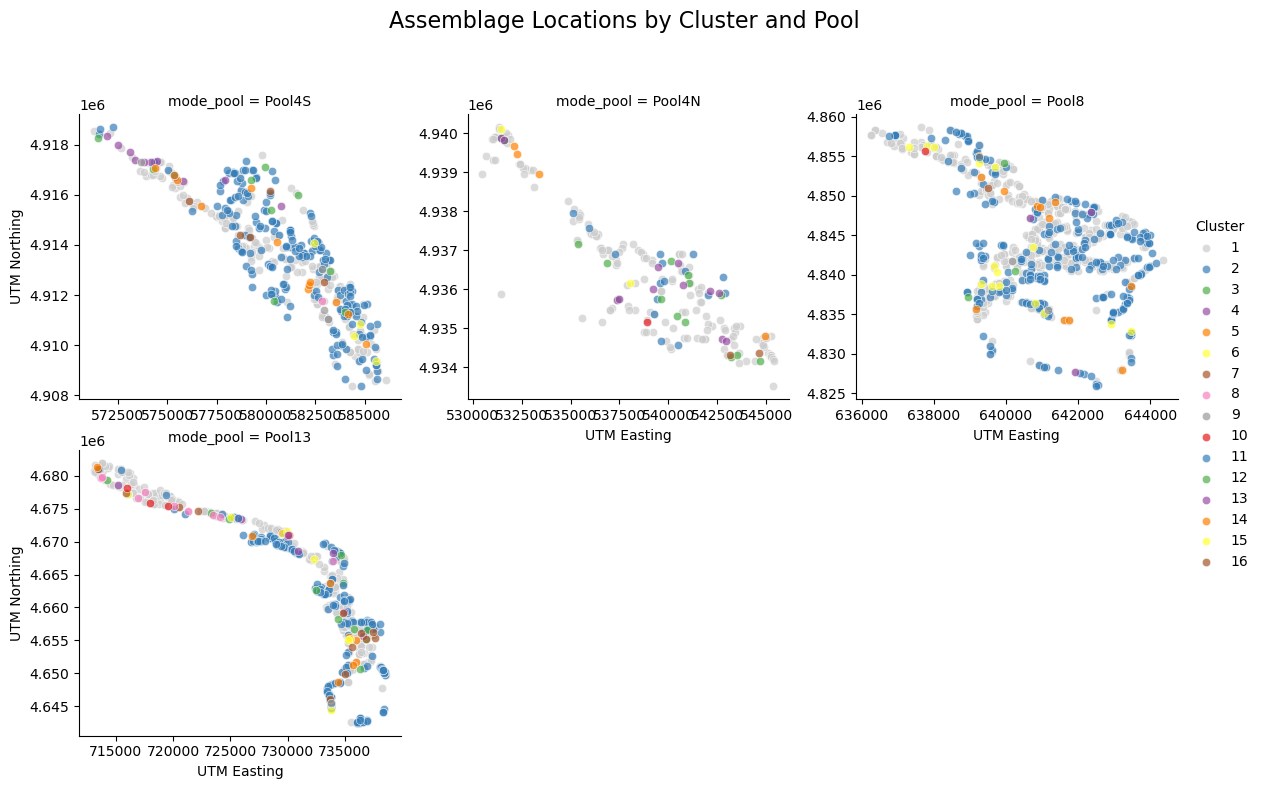

In [7]:
# Find the cluster with the largest count
cluster_sizes = df_explore['cluster'].value_counts()
largest_cluster = df_explore['cluster'].value_counts().idxmax()
unique_clusters = sorted(df_explore['cluster'].unique())
size_map = {c: f"{cluster_sizes[c]} sites" for c in unique_clusters}
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {c: col for c, col in zip(unique_clusters, palette)}
color_map[largest_cluster] = light_color

g = sns.FacetGrid(
    df_explore,
    col="mode_pool",
    hue="cluster",
    palette=color_map,
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="utm_e", y="utm_n", alpha=0.7)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Assemblage Locations by Cluster and Pool", fontsize=16)
plt.show()

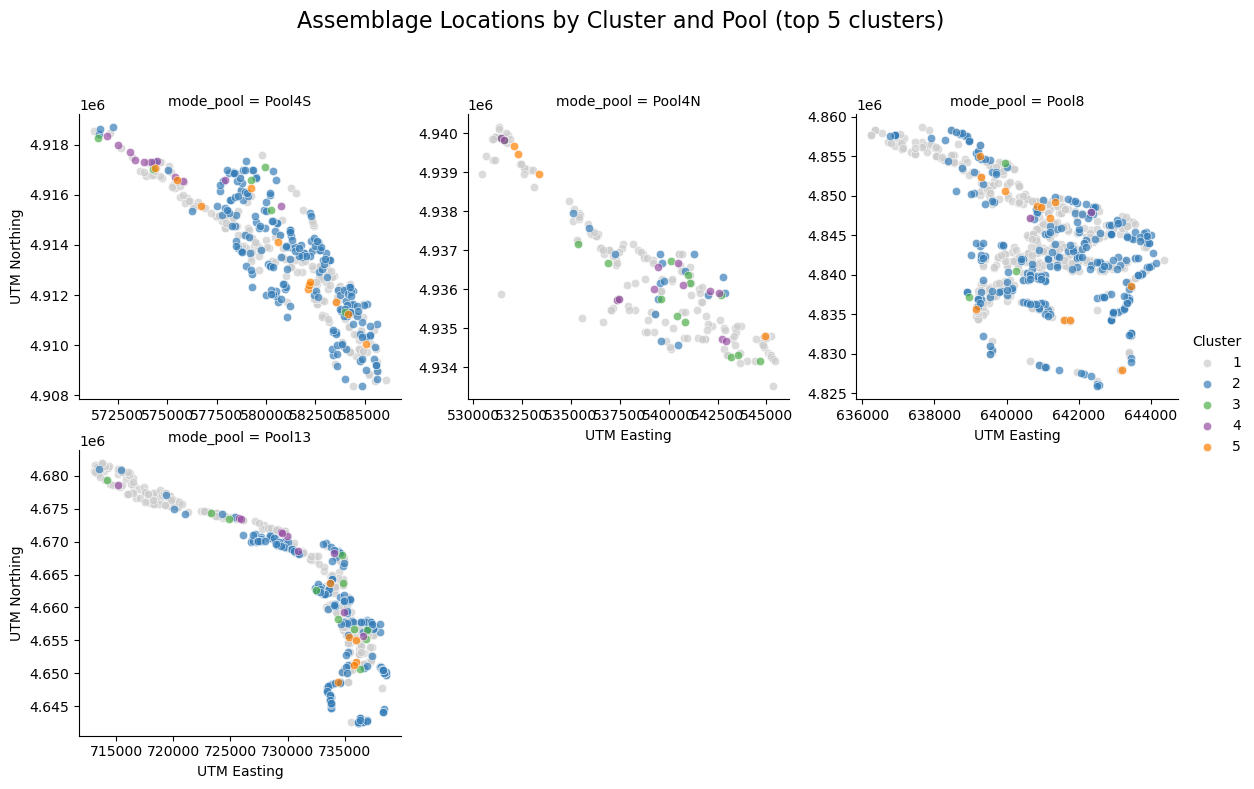

In [8]:
# Find the cluster with the largest count
cluster_sizes = df_explore['cluster'].value_counts()
largest_cluster = df_explore['cluster'].value_counts().idxmax()
unique_clusters = sorted(df_explore['cluster'].unique())
size_map = {c: f"{cluster_sizes[c]} sites" for c in unique_clusters}
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {c: col for c, col in zip(unique_clusters, palette)}
color_map[largest_cluster] = light_color

g = sns.FacetGrid(
    df_explore[df_explore['cluster'].isin(range(6))],
    col="mode_pool",
    hue="cluster",
    palette=color_map,
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="utm_e", y="utm_n", alpha=0.7)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Assemblage Locations by Cluster and Pool (top 5 clusters)", fontsize=16)
plt.show()

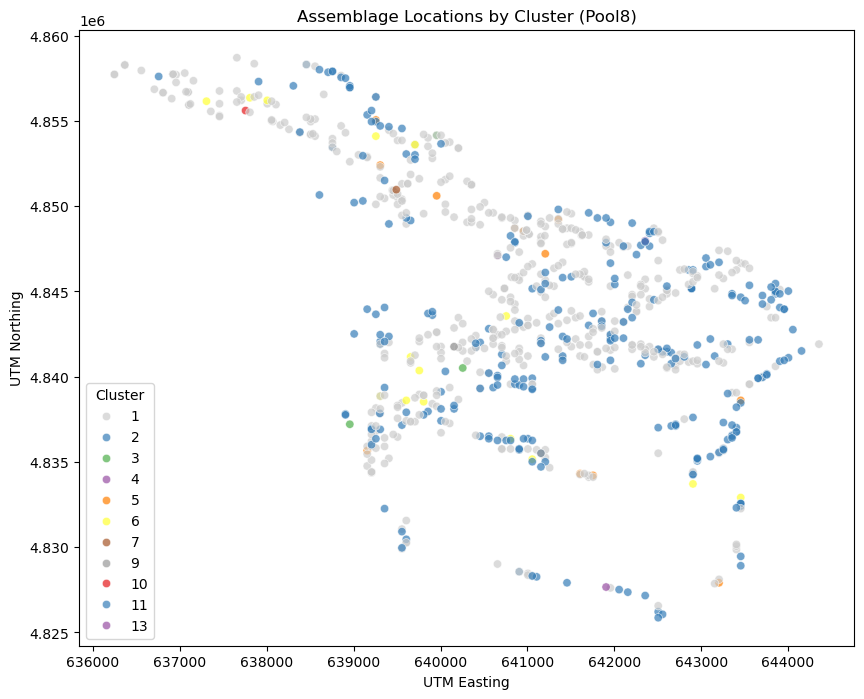

In [9]:
cluster_sizes = df_explore['cluster'].value_counts()
largest_cluster = cluster_sizes.idxmax()
unique_clusters = sorted(df_explore['cluster'].unique())
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {c: col for c, col in zip(unique_clusters, palette)}
color_map[largest_cluster] = light_color

#####
# Filter by specified pool
#####
pool_filter = 'Pool8'  # Change this to desired pool value
available_pools = sorted(df_explore['mode_pool'].unique().tolist())

if pool_filter not in available_pools:
    print(f"No rows for mode_pool == {pool_filter}. Available pools: {available_pools}")
else:
    df_pool = df_explore[df_explore['mode_pool'] == pool_filter].copy()

    # Plot using the same color_map as the global plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=df_pool,
        x="utm_e",
        y="utm_n",
        hue="cluster",
        palette=color_map,
        alpha=0.7
    )
    plt.xlabel("UTM Easting")
    plt.ylabel("UTM Northing")
    plt.title(f"Assemblage Locations by Cluster ({pool_filter})")
    plt.legend(title="Cluster")
    plt.show()

## <a id='toc2_2_'></a>[Cluster Characteristics](#toc0_)

We next inspected how each cluster varied in it’s species composition.

We will produce three vertical heatmaps for the Jaccard clustering method. Each heatmap shows the average percent presence of each fish species (rows) within each cluster (columns).

*What the graph means:*

-   **Columns**: Each column is a cluster of assemblages (sites grouped by fish community similarity).
-   **Rows**: Each row is a fish species (only those present in >10% of any cluster).
-   **Cell values**: The number in each cell is the percent of assemblages in that cluster where the species is present (0–100%).
-   **Color**: Darker blue = higher percent presence.
-   **Interpretation**: You can see which species are common or rare in each cluster, and how species composition differs between clusters and clustering methods.

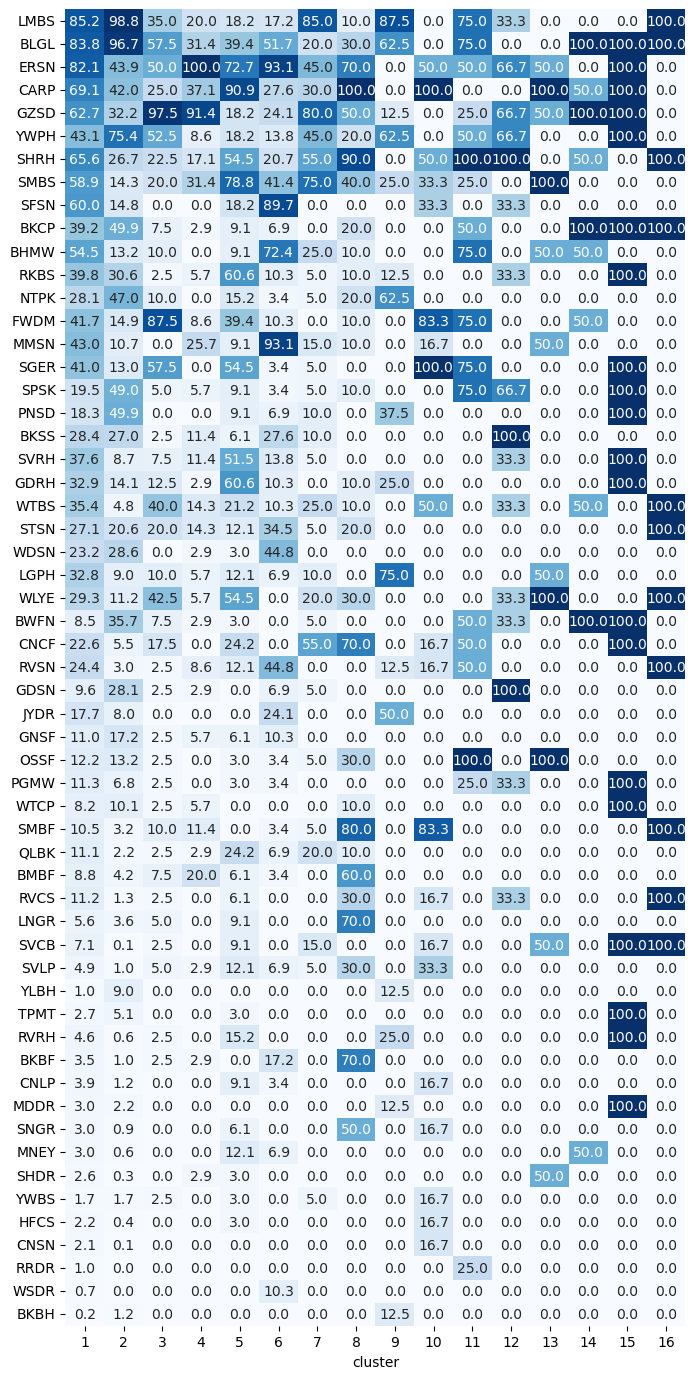

In [10]:
# Order species by overall frequency of occurrence (sum across columns)
species_cols = [c for c in fish_explore.columns if c != 'cluster']
species_order = fish_explore[species_cols].sum(axis=0).sort_values(ascending=False).index.tolist()

# Compute percent presence per cluster
jac_comp = fish_explore.groupby('cluster')[species_order].mean() * 100

# Keep species present in >10% of at least one cluster
filt = jac_comp.max() > 10
jac_comp = jac_comp.loc[:, filt]

# Plot heatmap (species as rows)
plt.figure(figsize=(8, 0.3 * jac_comp.shape[1]))
sns.heatmap(jac_comp.T, cmap='Blues', annot=True, fmt=".1f", cbar=False)
plt.show()

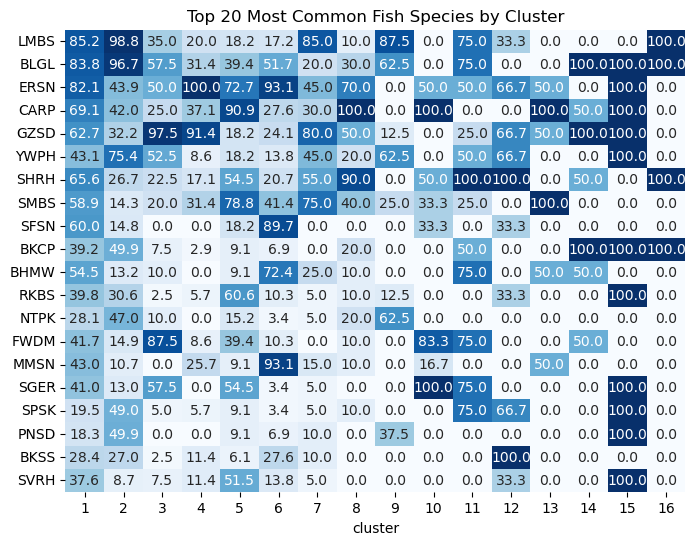

In [11]:
# Order species by overall frequency of occurrence (sum across columns)
species_cols = [c for c in fish_explore.columns if c != 'cluster']
species_order = fish_explore[species_cols].sum(axis=0).sort_values(ascending=False).index.tolist()

# Keep only top 20 most common species
top_20_species = species_order[:20]

# Compute percent presence per cluster for top 20 species only
jac_comp = fish_explore.groupby('cluster')[top_20_species].mean() * 100

# Plot heatmap (species as rows)
plt.figure(figsize=(8, 0.3 * len(top_20_species)))
sns.heatmap(jac_comp.T, cmap='Blues', annot=True, fmt=".1f", cbar=False)
plt.title('Top 20 Most Common Fish Species by Cluster')
plt.show()

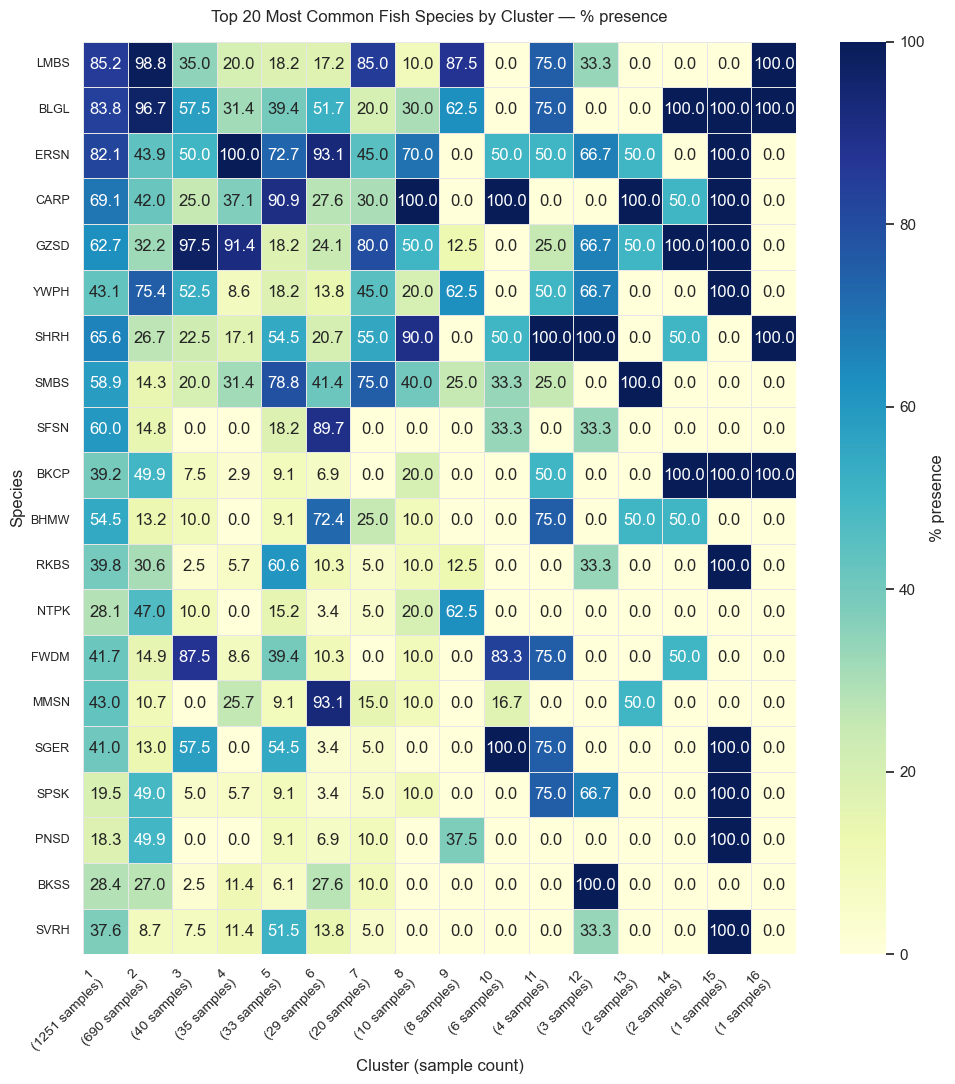

In [12]:
# Top-20 species heatmap — prettier, with cluster counts and improved styling
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("notebook", font_scale=1.0)

# Order species by overall frequency of occurrence (sum across columns)
species_cols = [c for c in fish_explore.columns if c != 'cluster']
species_order = fish_explore[species_cols].sum(axis=0).sort_values(ascending=False).index.tolist()

# Keep only top 20 most common species
fishcode_2_include = 20
top_species = species_order[:fishcode_2_include]

# Compute percent presence per cluster for top 20 species only
# Result: rows = cluster, cols = species
jac_comp = fish_explore.groupby('cluster')[top_species].mean() * 100

# Order clusters by overall sample count (so columns are in meaningful order)
cluster_sizes = df_explore['cluster'].value_counts()
cluster_order = [c for c in cluster_sizes.index if c in jac_comp.index]
jac_comp = jac_comp.reindex(cluster_order)

# Transpose so rows=species, cols=cluster (more natural for reading species)
display_df = jac_comp.T

# Create readable cluster labels with site counts
col_labels = [f"{c}\n({cluster_sizes.get(c,0)} samples)" for c in display_df.columns]

# Plot
fig, ax = plt.subplots(figsize=(max(10, 0.6 * display_df.shape[1]), 0.35 * display_df.shape[0] + 4))
cmap = sns.color_palette("YlGnBu", as_cmap=True)  # perceptually-uniform sequential

sns.heatmap(
    display_df,
    ax=ax,
    cmap=cmap,
    vmin=0,
    vmax=100,
    annot=True,
    fmt=".1f",
    linewidths=0.4,
    linecolor="0.9",
    cbar_kws={"label": "% presence"}
)

ax.set_xticklabels(col_labels, rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)
ax.set_xlabel("Cluster (sample count)")
ax.set_ylabel("Species")
ax.set_title(f"Top {fishcode_2_include} Most Common Fish Species by Cluster — % presence", pad=14)
plt.tight_layout()
plt.show()

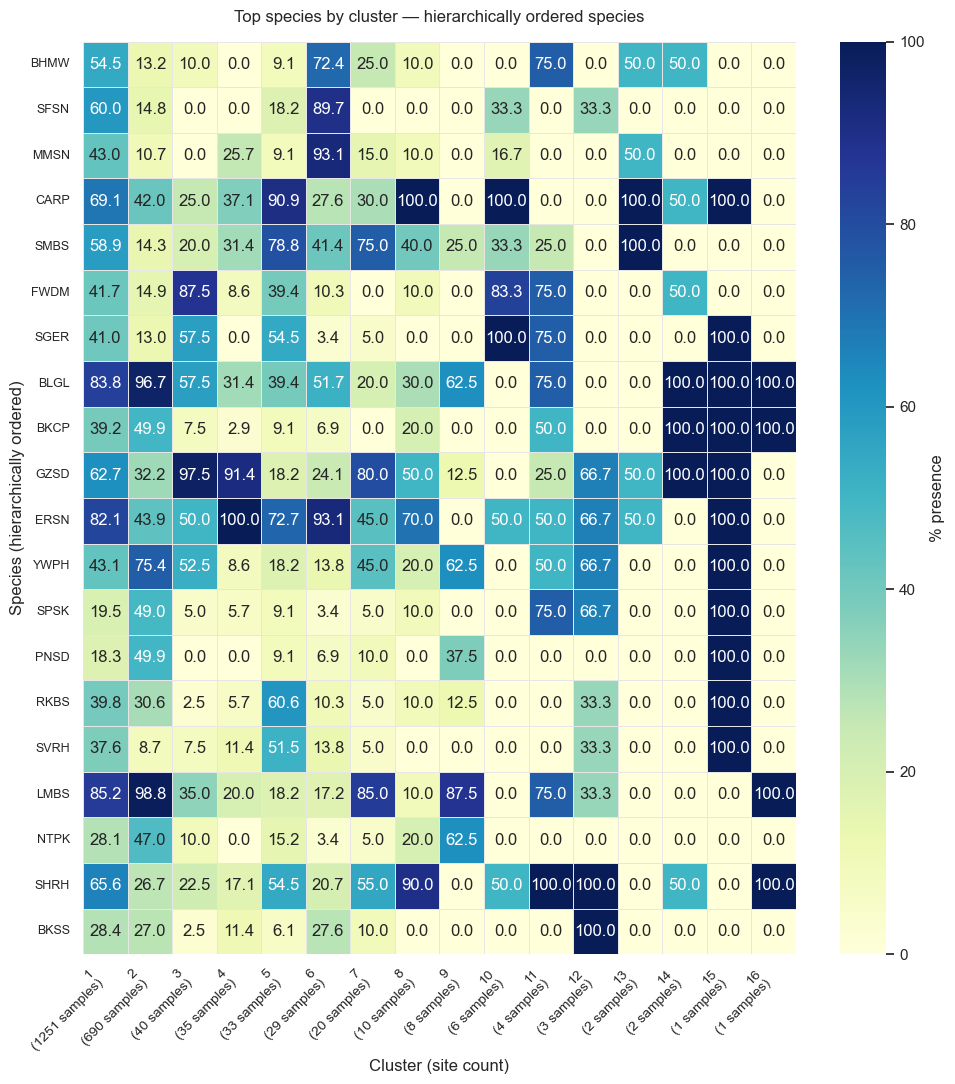

In [13]:
# ...existing code...
# Transpose so rows=species, cols=cluster (more natural for reading species)
display_df = jac_comp.T

# ---------- hierarchical ordering of species (rows) ----------
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# compute pairwise distance between species (rows)
# try correlation distance (pattern similarity); fallback to Euclidean if it fails
try:
    dist_vec = pdist(display_df.values, metric='correlation')
    if (dist_vec != dist_vec).any():  # check for NaNs
        raise ValueError
except Exception:
    dist_vec = pdist(display_df.values, metric='euclidean')

Z = linkage(dist_vec, method='average')   # average linkage
leaf_order = dendrogram(Z, no_plot=True)['leaves']

# reorder rows (species) by hierarchical clustering leaves
display_df = display_df.iloc[leaf_order, :]

# ---------- plot heatmap with reordered species ----------
fig, ax = plt.subplots(figsize=(max(10, 0.6 * display_df.shape[1]), 0.35 * display_df.shape[0] + 4))
cmap = sns.color_palette("YlGnBu", as_cmap=True)

sns.heatmap(
    display_df,
    ax=ax,
    cmap=cmap,
    vmin=0,
    vmax=100,
    annot=True,
    fmt=".1f",
    linewidths=0.4,
    linecolor="0.9",
    cbar_kws={"label": "% presence"}
)

ax.set_xticklabels(col_labels, rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)
ax.set_xlabel("Cluster (site count)")
ax.set_ylabel("Species (hierarchically ordered)")
ax.set_title("Top species by cluster — hierarchically ordered species", pad=14)
plt.tight_layout()
plt.show()
# ...existing code...

## Clusters over time

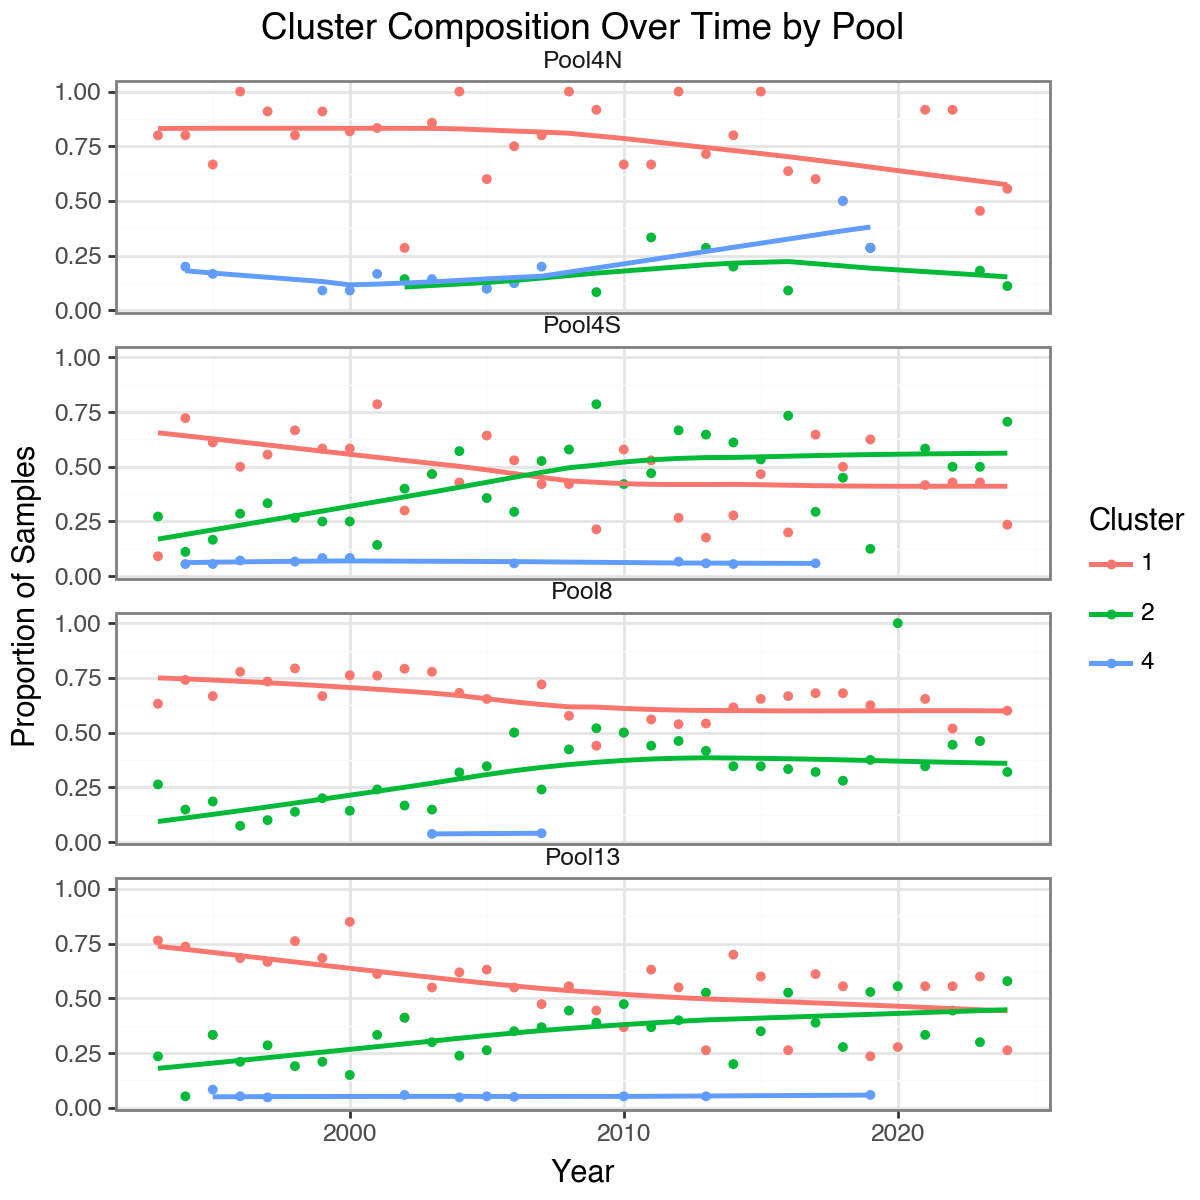

In [14]:
from plotnine import *

# Calculate proportion of samples in each cluster per year
cluster_time = df_explore.groupby(['year', 'cluster']).size().reset_index(name='count')
total_per_year = cluster_time.groupby('year')['count'].transform('sum')
cluster_time['proportion'] = cluster_time['count'] / total_per_year
cluster_time['cluster'] = cluster_time['cluster'].astype(str)

# Calculate proportion per year per cluster per pool
cluster_time_pool = df_explore.groupby(['year', 'cluster', 'mode_pool']).size().reset_index(name='count')
total_per_year_pool = cluster_time_pool.groupby(['year', 'mode_pool'])['count'].transform('sum')
cluster_time_pool['proportion'] = cluster_time_pool['count'] / total_per_year_pool
cluster_time_pool['cluster'] = cluster_time_pool['cluster'].astype(str)

# Filter out a cluster and plot with labels, smoothing only for groups with >= 2 points
grp_size2 = cluster_time_pool.groupby(['mode_pool', 'cluster'])['year'].transform('size')
filtered_smooth = cluster_time_pool[grp_size2 >= 2]

# ensure desired pool order and filter to clusters < 5
desired_order = ["Pool4N", "Pool4S", "Pool8", "Pool13"]

# Filter out a cluster and plot with labels, smoothing only for groups with >= 2 points
grp_size2 = cluster_time_pool.groupby(['mode_pool', 'cluster'])['year'].transform('size')
filtered_smooth = cluster_time_pool[grp_size2 >= 2]

cluster_time_pool_lt5 = cluster_time_pool[cluster_time_pool['cluster'].astype(int).isin([1,2,4])].copy()
filtered_smooth_lt5 = filtered_smooth[filtered_smooth['cluster'].astype(int).isin([1,2,4])].copy()

# keep only pools in desired_order and set categorical with the specific order
cluster_time_pool_lt5 = cluster_time_pool_lt5[cluster_time_pool_lt5['mode_pool'].isin(desired_order)].copy()
filtered_smooth_lt5 = filtered_smooth_lt5[filtered_smooth_lt5['mode_pool'].isin(desired_order)].copy()

cluster_time_pool_lt5['mode_pool'] = pd.Categorical(cluster_time_pool_lt5['mode_pool'], categories=desired_order, ordered=True)
filtered_smooth_lt5['mode_pool'] = pd.Categorical(filtered_smooth_lt5['mode_pool'], categories=desired_order, ordered=True)

# plot with facet order preserved
(ggplot(cluster_time_pool_lt5, aes(x='year', y='proportion', color='cluster')) +
 geom_point(size=1) +
 geom_smooth(data=filtered_smooth_lt5, method='lowess', se=False) +
 facet_wrap('~mode_pool', ncol=1) +
 labs(x='Year', y='Proportion of Samples', color='Cluster',
      title='Cluster Composition Over Time by Pool') +
 theme_bw()+
 theme(figure_size=(6, 6),
       strip_background = element_blank())
)

In [15]:
cluster_time_pool_lt5.head()

,year,cluster,mode_pool,count,proportion
0,1993,1,Pool13,13,0.764706
1,1993,1,Pool4N,4,0.800000
2,1993,1,Pool4S,1,0.090909
3,1993,1,Pool8,12,0.631579
4,1993,2,Pool13,4,0.235294


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import f as f_dist
from plotnine import *

# =====================================================================
# SEGMENTED REGRESSION FOR ALL POOL-CLUSTER COMBINATIONS
# =====================================================================

def piecewise_linear(x, x0, y0, m1, m2):
    """
    Continuous piecewise linear function with breakpoint at x0.
    Left (x <= x0): y = y0 + m1*(x - x0)
    Right (x > x0): y = y0 + m2*(x - x0)
    """
    return np.piecewise(
        x,
        [x <= x0, x > x0],
        [lambda z: y0 + m1 * (z - x0),
         lambda z: y0 + m2 * (z - x0)]
    )

def fit_segmented_regression(years, proportions, min_points=6):
    """
    Fit continuous segmented regression with one breakpoint using curve_fit.
    
    Returns:
    --------
    dict with fit results or None if insufficient data
    """
    years = np.asarray(years, dtype=float)
    proportions = np.asarray(proportions, dtype=float)
    
    if len(years) < min_points:
        return None
    
    # Initial guesses
    x0_guess = np.median(years)
    y0_guess = proportions[np.argmin(np.abs(years - x0_guess))]
    m1_guess = 0.0
    m2_guess = 0.0
    p0 = [x0_guess, y0_guess, m1_guess, m2_guess]
    
    # Bounds: keep breakpoint inside observed range
    bounds = (
        [years.min(), -np.inf, -np.inf, -np.inf],
        [years.max(),  np.inf,  np.inf,  np.inf]
    )
    
    try:
        # Fit piecewise model
        params, cov = optimize.curve_fit(
            piecewise_linear,
            years, proportions,
            p0=p0,
            bounds=bounds,
            maxfev=10000
        )
        
        x0_fit, y0_fit, m1_fit, m2_fit = params
        y_hat = piecewise_linear(years, *params)
        rss_piece = np.sum((proportions - y_hat)**2)
        
        # Simple linear model for comparison
        slope_simple, intercept_simple = np.polyfit(years, proportions, 1)
        y_hat_simple = slope_simple * years + intercept_simple
        rss_simple = np.sum((proportions - y_hat_simple)**2)
        
        # F-test
        n = len(years)
        k_piece = 4  # x0, y0, m1, m2
        k_simple = 2
        
        if n > k_piece and rss_piece > 0:
            f_stat = ((rss_simple - rss_piece) / (k_piece - k_simple)) / (rss_piece / (n - k_piece))
            p_value = 1 - f_dist.cdf(f_stat, k_piece - k_simple, n - k_piece)
        else:
            f_stat = np.nan
            p_value = np.nan
        
        return {
            'breakpoint': x0_fit,
            'y_at_break': y0_fit,
            'slope_before': m1_fit,
            'slope_after': m2_fit,
            'rss_piecewise': rss_piece,
            'rss_simple': rss_simple,
            'improvement_pct': 100 * (rss_simple - rss_piece) / rss_simple if rss_simple > 0 else 0,
            'f_stat': f_stat,
            'p_value': p_value,
            'significant': (p_value < 0.05) if not np.isnan(p_value) else False,
            'n_points': n,
            'params': params,
            'cov': cov
        }
    
    except Exception as e:
        print(f"  Warning: Fit failed - {str(e)}")
        return None

# =====================================================================
# FIT ALL POOL-CLUSTER COMBINATIONS
# =====================================================================

results = []
fitted_data = []

for (pool, cluster), grp in cluster_time_pool_lt5.groupby(['mode_pool', 'cluster'], observed=False):
    # Sort and convert to numpy
    sub = grp[['year', 'proportion']].dropna().sort_values('year')
    years = sub['year'].to_numpy(dtype=float)
    props = sub['proportion'].to_numpy(dtype=float)
    
    res = fit_segmented_regression(years, props)
    
    if res:
        # Store results
        results.append({
            'mode_pool': pool,
            'cluster': cluster,
            'breakpoint_year': res['breakpoint'],
            'y_at_breakpoint': res['y_at_break'],
            'slope_before': res['slope_before'],
            'slope_after': res['slope_after'],
            'improvement_pct': res['improvement_pct'],
            'f_statistic': res['f_stat'],
            'p_value': res['p_value'],
            'significant': res['significant'],
            'n_points': res['n_points']
        })
        
        # Generate fitted values for plotting
        y_fitted = piecewise_linear(years, *res['params'])
        for yr, y_fit in zip(years, y_fitted):
            fitted_data.append({
                'mode_pool': pool,
                'cluster': cluster,
                'year': yr,
                'fitted': y_fit
            })

# Convert to DataFrames
segmented_results_df = pd.DataFrame(results).sort_values(['mode_pool', 'cluster'])
fitted_values_df = pd.DataFrame(fitted_data)

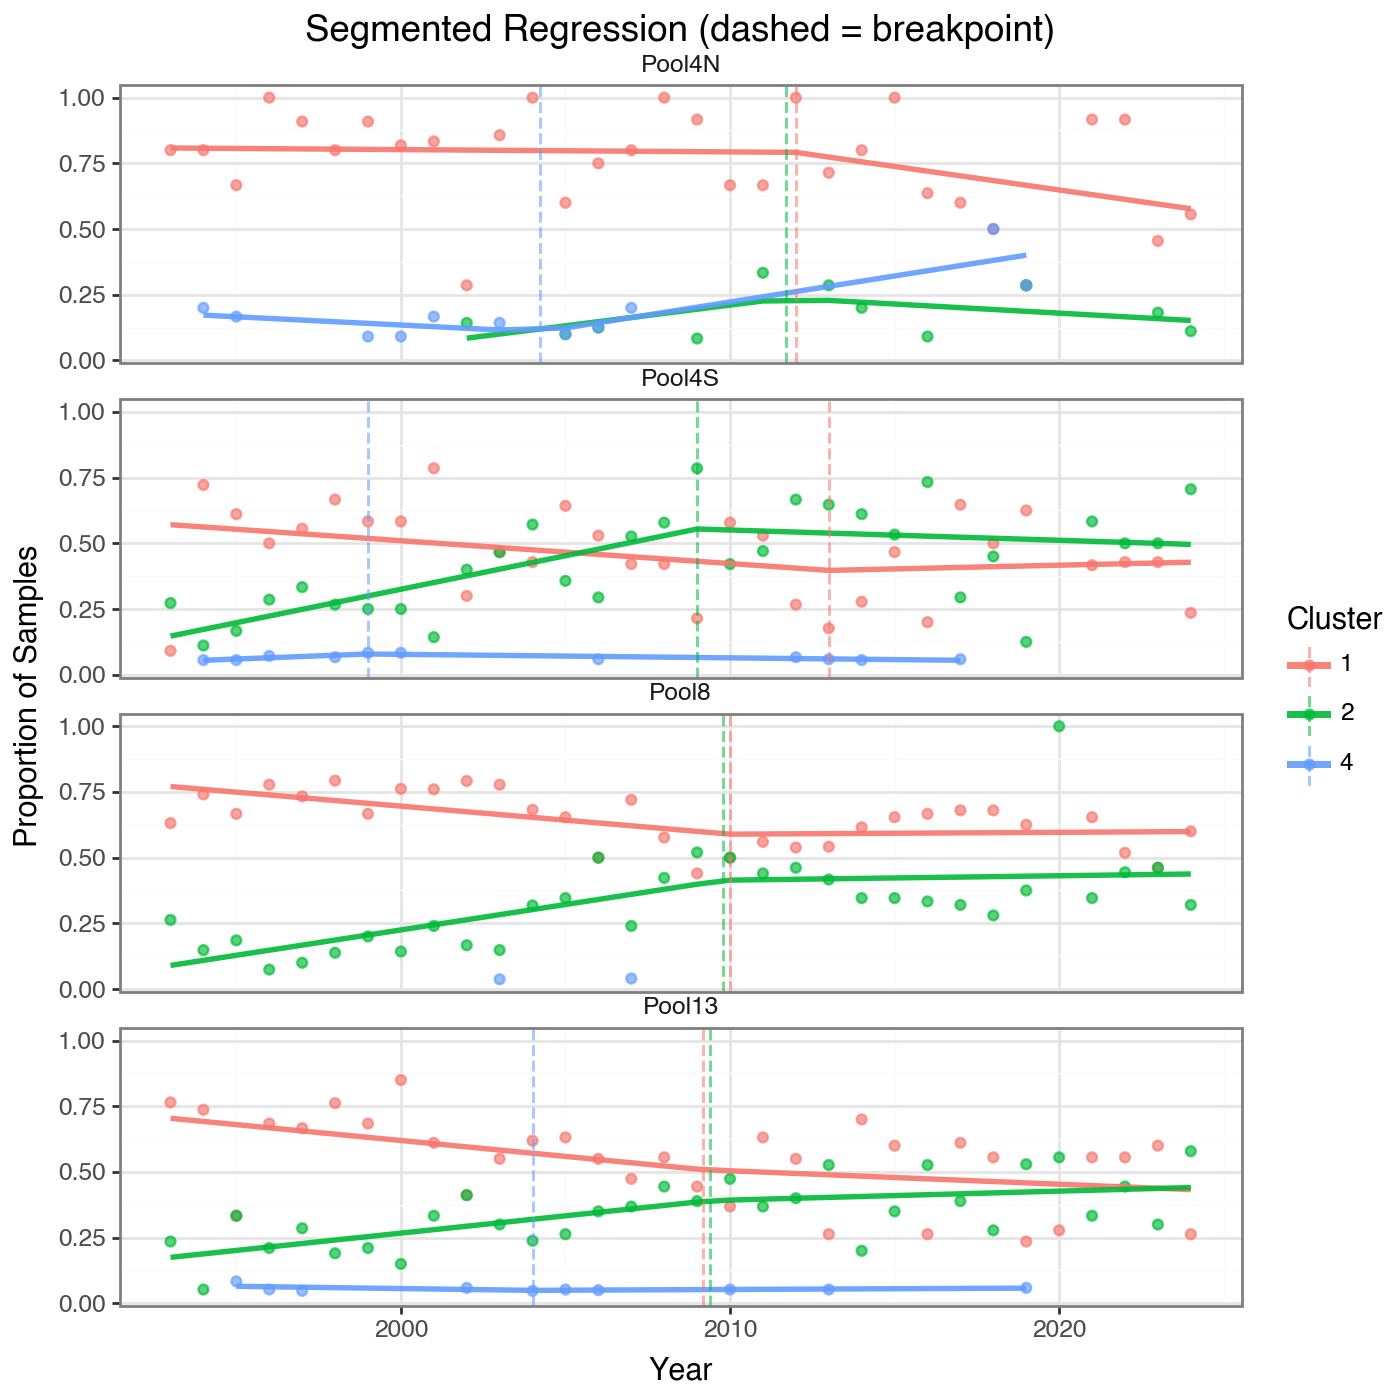

In [35]:
annotated_data = cluster_time_pool_lt5.merge(
     segmented_results_df[['mode_pool', 'cluster', 'breakpoint_year', 'significant']],
     on=['mode_pool', 'cluster'],
     how='left'
)

# ensure desired pool order and filter to clusters < 5
desired_order = ["Pool4N", "Pool4S", "Pool8", "Pool13"]

annotated_data['mode_pool'] = pd.Categorical(cluster_time_pool_lt5['mode_pool'], categories=desired_order, ordered=True)
fitted_values_df['mode_pool'] = pd.Categorical(fitted_values_df['mode_pool'], categories=desired_order, ordered=True)
# Filter out rows with missing breakpoint_year for the vline layer
breakpoint_data = annotated_data.dropna(subset=['breakpoint_year'])

# Display plot
(
    ggplot(annotated_data, aes(x='year', y='proportion', color='cluster')) +
    geom_point(size=1.5, alpha=0.65) +
    geom_line(data=fitted_values_df, mapping=aes(x='year', y='fitted', color='cluster'),
              size=1.1, alpha=0.9) +
    geom_vline(data=breakpoint_data, mapping=aes(xintercept='breakpoint_year', color='cluster'),
               linetype='dashed', alpha=0.55, size=0.6) +
    facet_wrap('~mode_pool', ncol=1) +
    labs(x='Year', y='Proportion of Samples', color='Cluster',
         title='Segmented Regression (dashed = breakpoint)') +
    theme_bw() +
    theme(figure_size=(7, 7), strip_background=element_blank())
)

In [37]:
# Pivot table format
pivot_table = segmented_results_df.pivot(
    index='mode_pool', 
    columns='cluster', 
    values='breakpoint_year'
)
pivot_table = pivot_table.round(0).astype('Int64')

# Reorder rows to match desired_order
desired_order = ["Pool4N", "Pool4S", "Pool8", "Pool13"]
pivot_table = pivot_table.reindex(desired_order)

print("\n" + "=" * 60)
print("BREAKPOINT YEARS (Pools × Clusters)")
print("=" * 60)
print(pivot_table)


BREAKPOINT YEARS (Pools × Clusters)
cluster       1     2     4
mode_pool                  
Pool4N     2012  2012  2004
Pool4S     2013  2009  1999
Pool8      2010  2010  <NA>
Pool13     2009  2009  2004


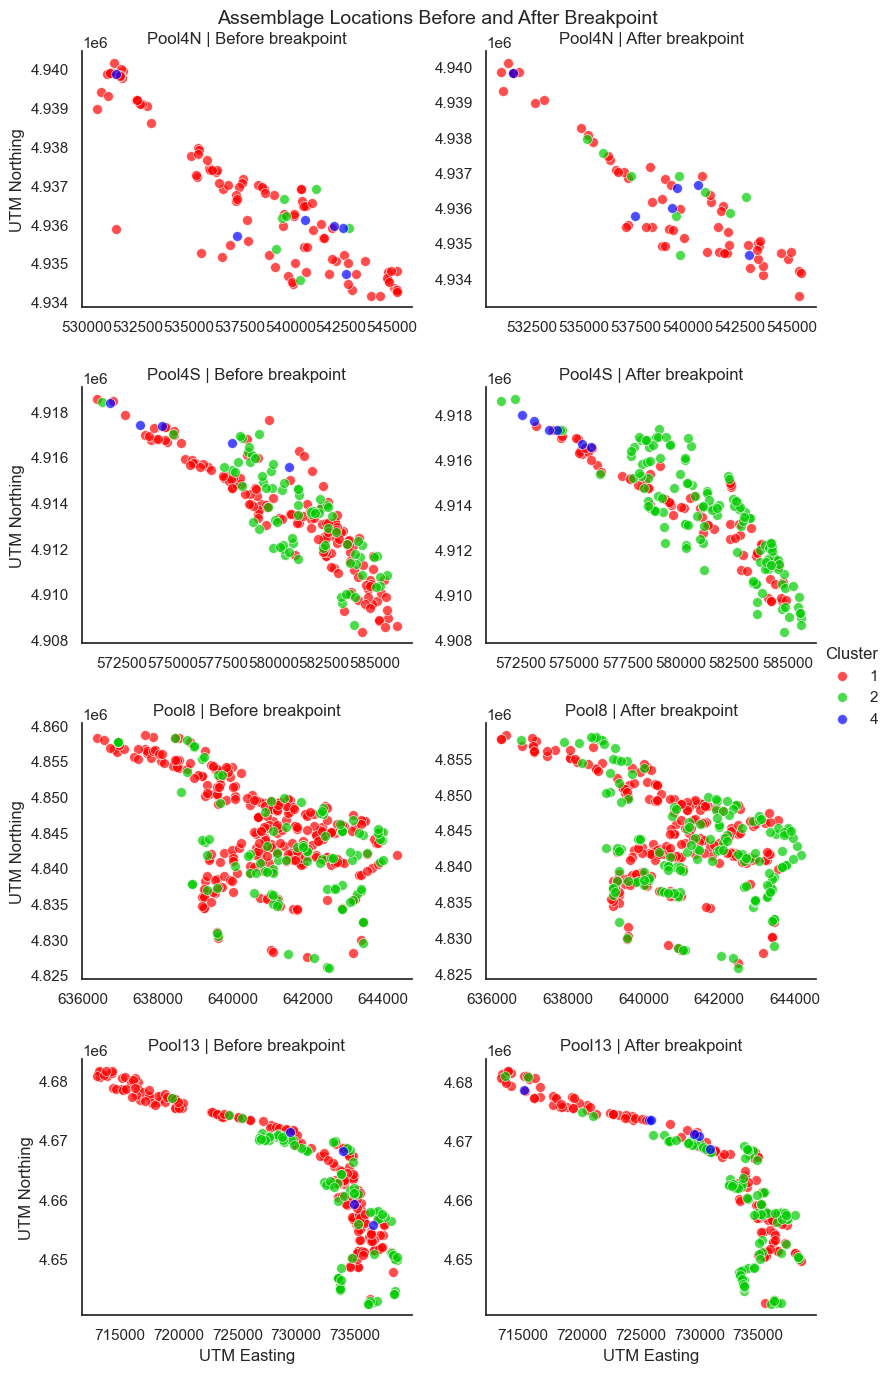

In [44]:
# Find the cluster with the largest count
cluster_sizes = df_explore['cluster'].value_counts()
largest_cluster = df_explore['cluster'].value_counts().idxmax()
unique_clusters = sorted(df_explore['cluster'].unique())

# Custom color palette: cluster 1=red, 2=green, 4=blue
custom_colors = {
    1: (1.0, 0.0, 0.0),      # red
    2: (0.0, 0.8, 0.0),      # green
    4: (0.0, 0.0, 1.0)       # blue
}

# For other clusters, use default palette
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
color_map = {}
palette_idx = 0
for c in unique_clusters:
    if c in custom_colors:
        color_map[c] = custom_colors[c]
    else:
        color_map[c] = palette[palette_idx]
        palette_idx += 1

# Ensure cluster dtype matches between df_explore and segmented_results_df to avoid merge errors
if 'cluster' in segmented_results_df.columns:
    target_dtype = df_explore['cluster'].dtype
    if segmented_results_df['cluster'].dtype != target_dtype:
        # If df_explore cluster is integer-like, cast segmented_results_df cluster to int
        if np.issubdtype(target_dtype, np.integer):
            segmented_results_df = segmented_results_df.copy()
            segmented_results_df['cluster'] = segmented_results_df['cluster'].astype(int)
        else:
            # otherwise cast to the same dtype as df_explore
            segmented_results_df = segmented_results_df.copy()
            segmented_results_df['cluster'] = segmented_results_df['cluster'].astype(target_dtype)

# Merge breakpoint data with df_explore
df_with_breakpoints = df_explore.merge(
    segmented_results_df[['mode_pool', 'cluster', 'breakpoint_year']],
    on=['mode_pool', 'cluster'],
    how='left'
)

# Create before/after period column
def assign_period(row):
    if pd.isna(row['breakpoint_year']):
        return 'No breakpoint'
    elif row['year'] <= row['breakpoint_year']:
        return 'Before breakpoint'
    else:
        return 'After breakpoint'

df_with_breakpoints['period'] = df_with_breakpoints.apply(assign_period, axis=1)

# Filter to desired pools and clusters
desired_order = ["Pool4N", "Pool4S", "Pool8", "Pool13"]
df_filtered = df_with_breakpoints[
    (df_with_breakpoints['mode_pool'].isin(desired_order)) &
    (df_with_breakpoints['cluster'].isin([1, 2, 4])) &
    (df_with_breakpoints['period'] != 'No breakpoint')
].copy()

# Set categorical order for mode_pool
df_filtered['mode_pool'] = pd.Categorical(
    df_filtered['mode_pool'], 
    categories=desired_order, 
    ordered=True
)

# Create FacetGrid with row=mode_pool, col=period
g = sns.FacetGrid(
    df_filtered,
    row="mode_pool",
    col="period",
    hue="cluster",
    palette=color_map,
    height=3.5,
    aspect=1.2,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="utm_e", y="utm_n", alpha=0.7, s=50)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.figure.subplots_adjust(top=0.95)
g.figure.suptitle("Assemblage Locations Before and After Breakpoint", fontsize=14)
plt.show()

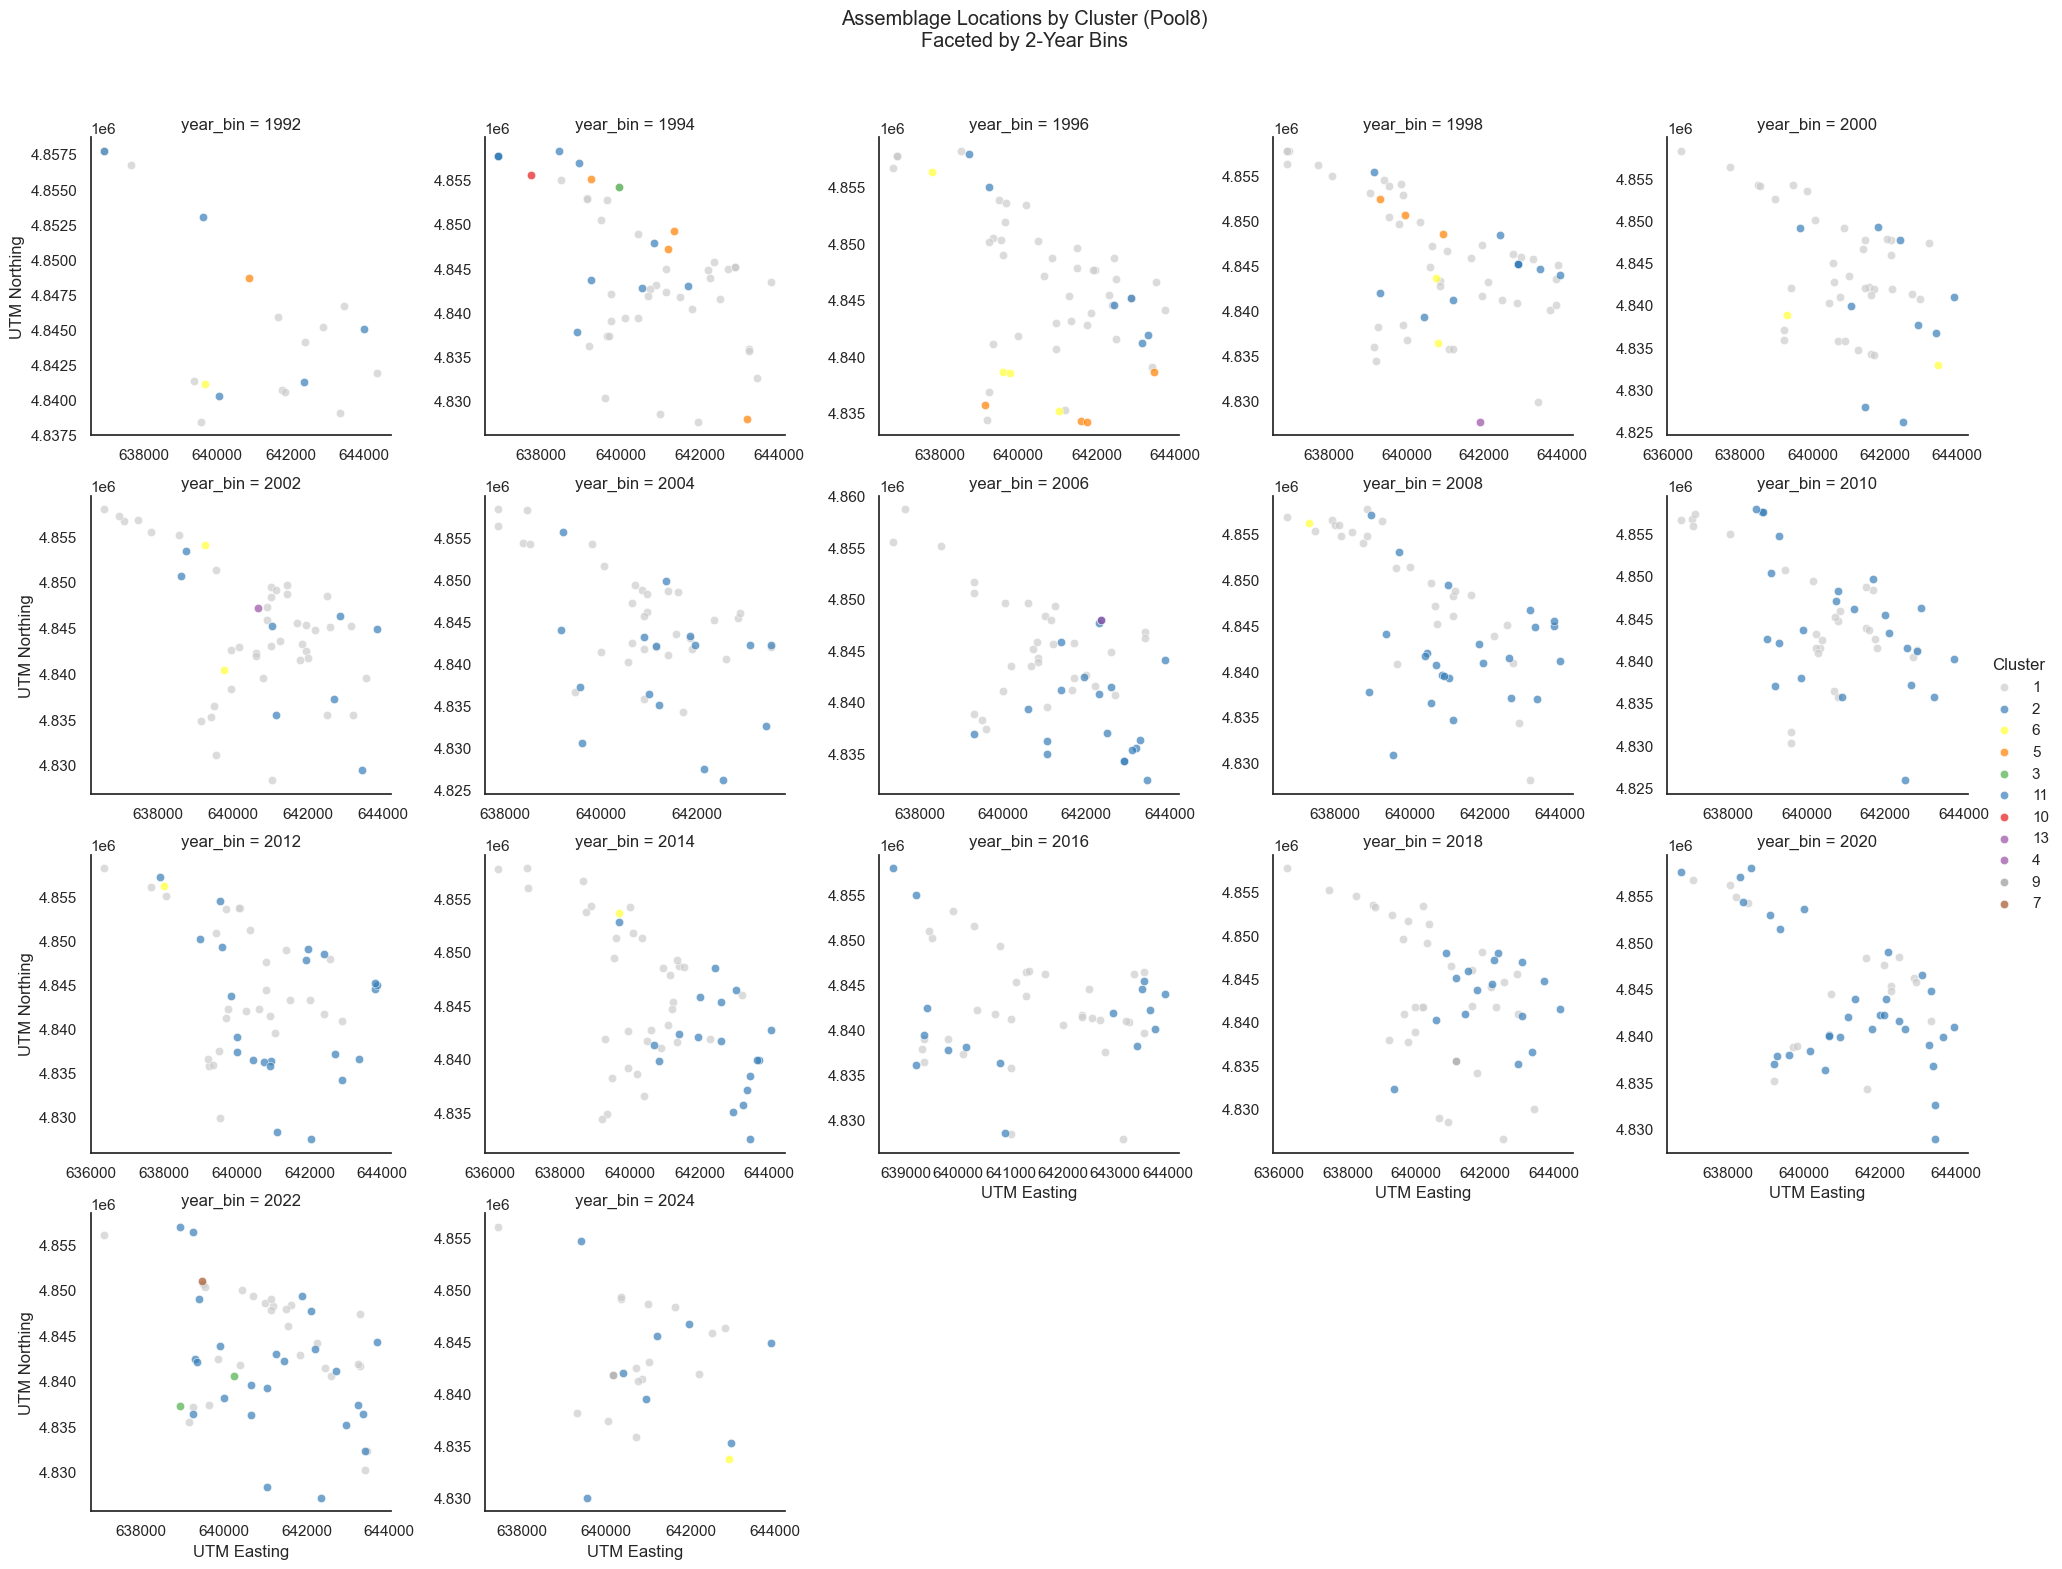

In [17]:
# Use the same color_map as the global plot
cluster_sizes = df_explore['cluster'].value_counts()
largest_cluster = cluster_sizes.idxmax()
unique_clusters = sorted(df_explore['cluster'].unique())
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {str(c): col for c, col in zip(unique_clusters, palette)}
color_map[str(largest_cluster)] = light_color

if pool_filter not in available_pools:
    print(f"No rows for mode_pool == {pool_filter}. Available pools: {available_pools}")
else:
    df_pool = df_explore[df_explore['mode_pool'] == pool_filter].copy()
    
    YEAR_BIN = 2
    # Create a new column for year bins
    df_pool['year_bin'] = ((df_pool['year']) // YEAR_BIN) * YEAR_BIN

    # Ensure cluster column is string type for consistency (optional, for legend order)
    df_pool['cluster'] = df_pool['cluster'].astype(str)

    # Create the FacetGrid using the global color_map
    g = sns.FacetGrid(
        df_pool,
        col="year_bin",
        col_wrap=5,
        height=4,
        sharex=False,
        sharey=False,
        hue="cluster",
        palette=color_map  # Use global color map for consistency
    )
    g.map_dataframe(
        sns.scatterplot,
        x="utm_e",
        y="utm_n",
        alpha=0.7
    )
    g.add_legend(title="Cluster")
    g.set_axis_labels("UTM Easting", "UTM Northing")
    g.figure.subplots_adjust(top=0.9)
    g.figure.suptitle(f"Assemblage Locations by Cluster ({pool_filter})\nFaceted by {YEAR_BIN}-Year Bins")
    plt.show()


DFA for proportion of samples in each cluster over time, faceted by pool.

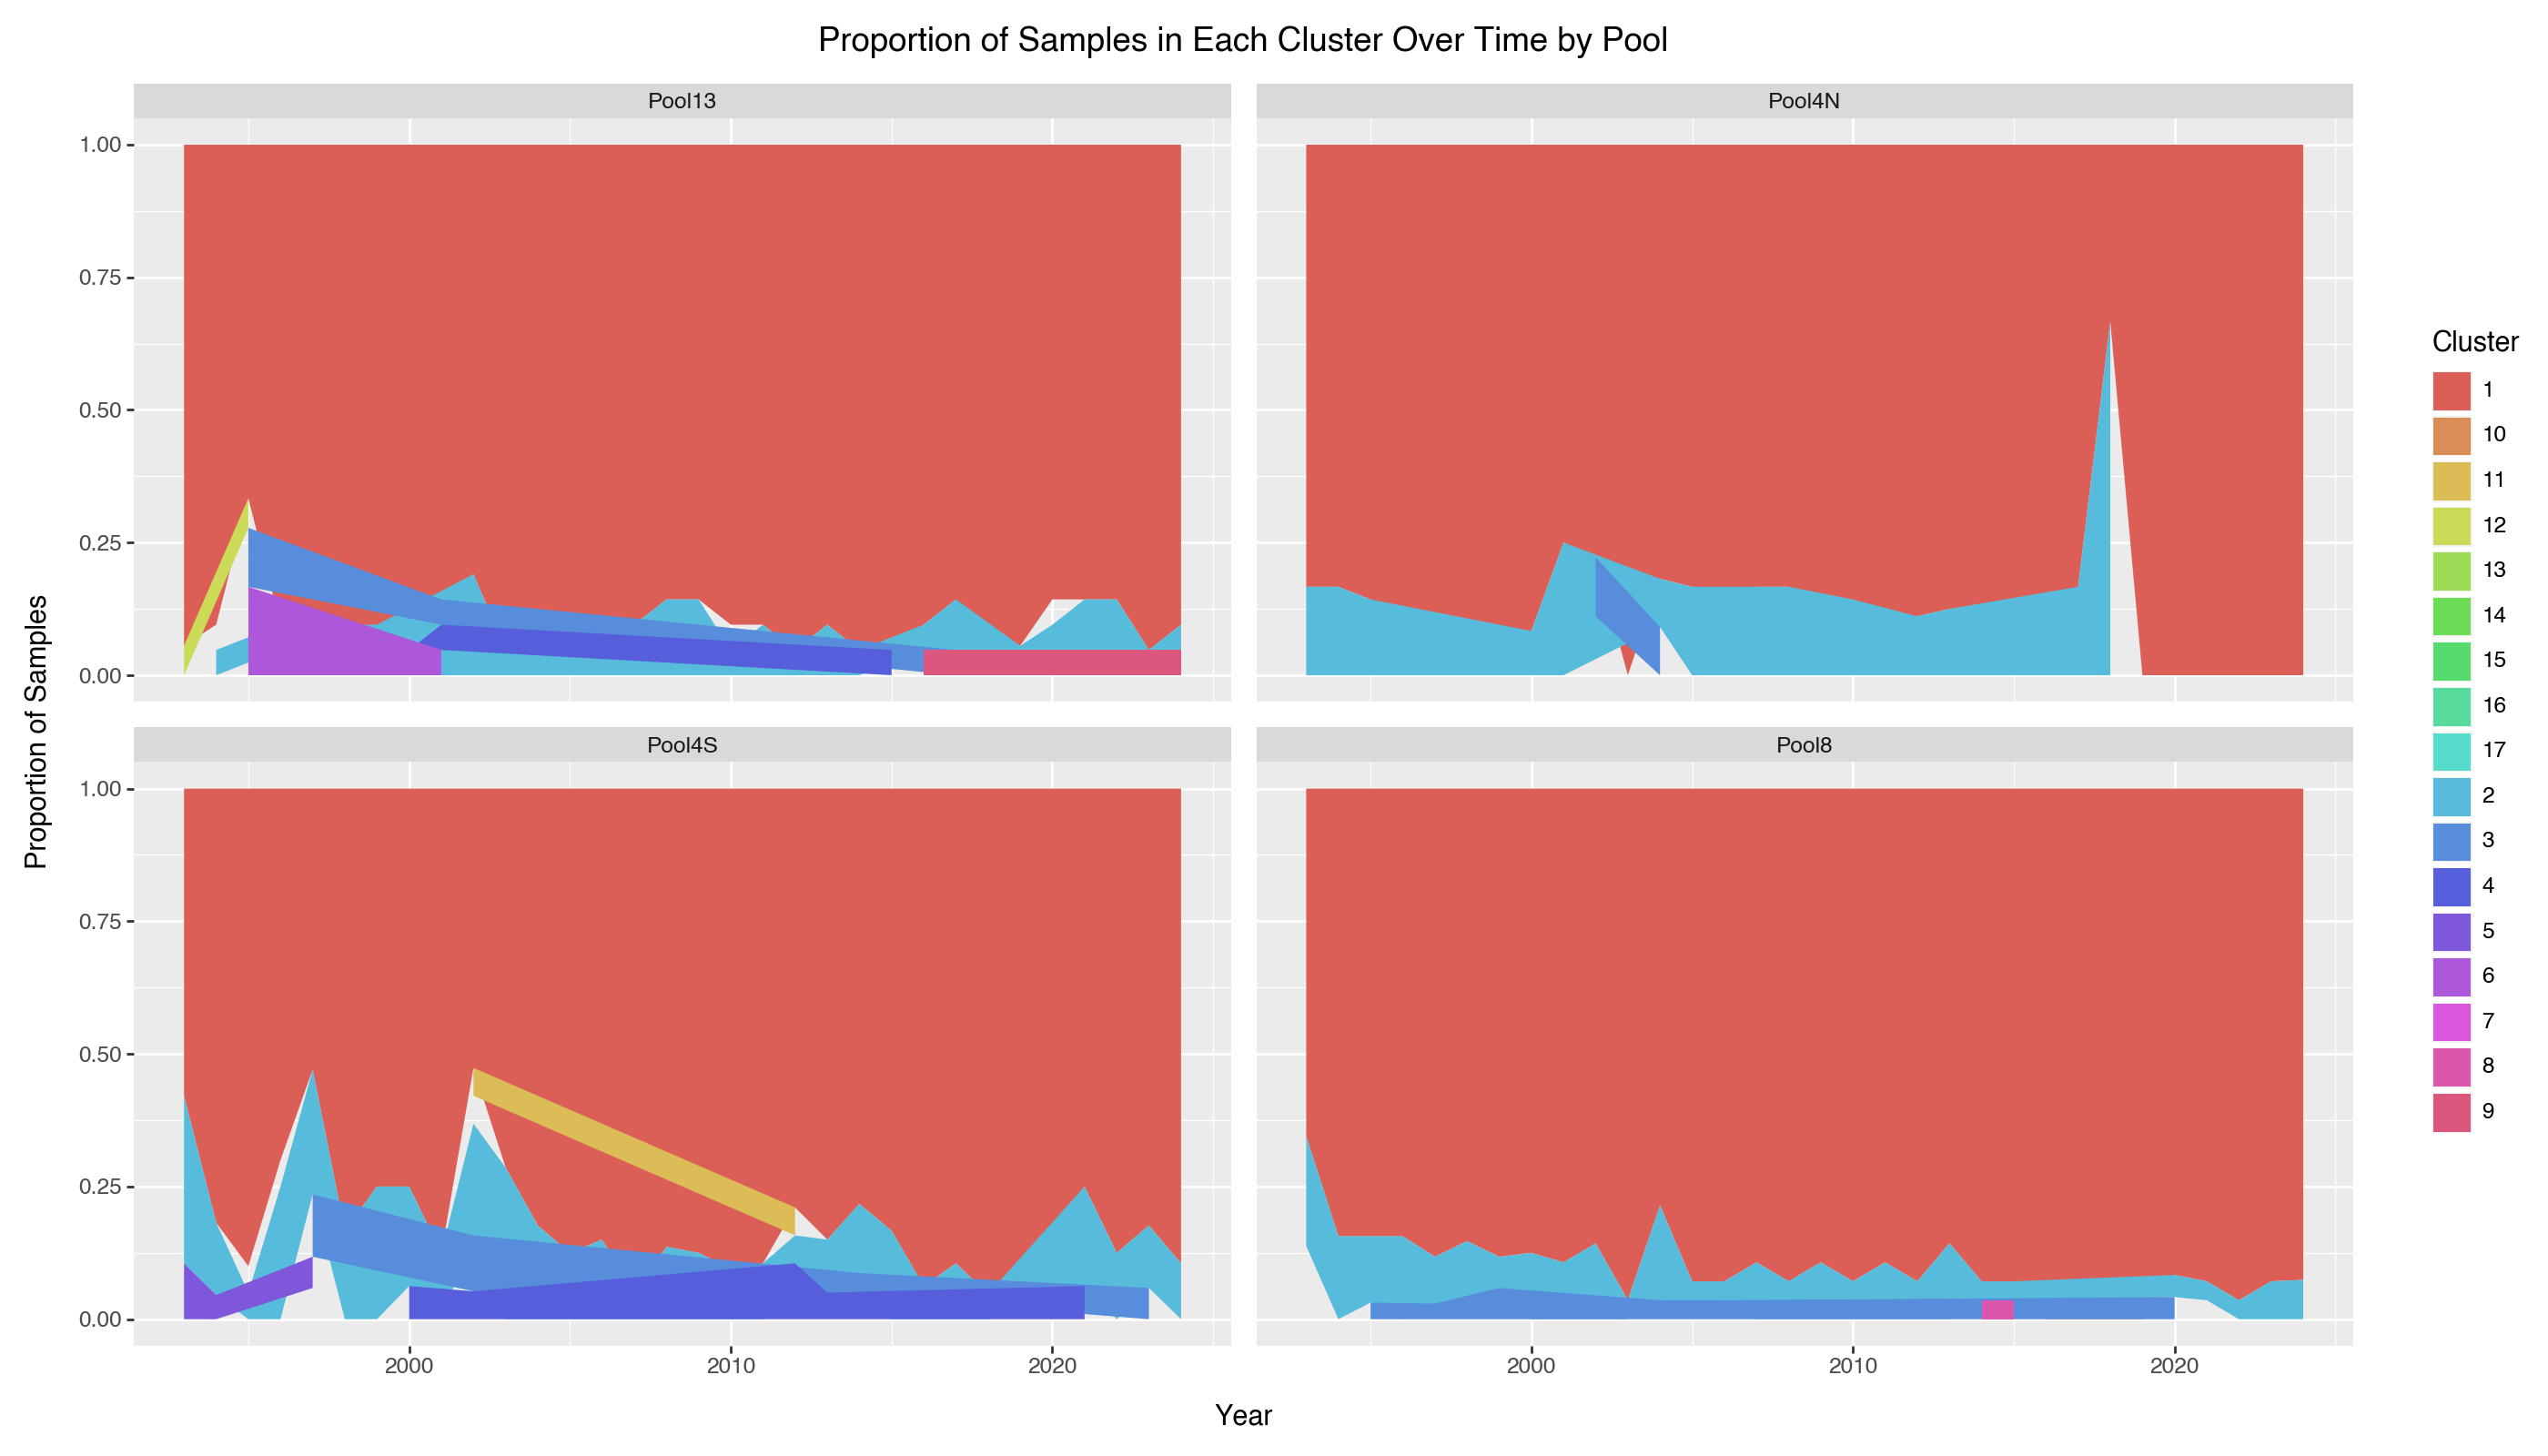

In [24]:
# Prepare data for DFA-style analysis: proportion of samples in each cluster over time by pool
cluster_proportions = df_explore.groupby(['year', 'mode_pool', 'cluster']).size().reset_index(name='count')

# Calculate total samples per year per pool
totals = cluster_proportions.groupby(['year', 'mode_pool'])['count'].transform('sum')
cluster_proportions['proportion'] = cluster_proportions['count'] / totals

# Convert cluster to string for plotting
cluster_proportions['cluster'] = cluster_proportions['cluster'].astype(str)

# Create stacked area plot showing proportions over time, faceted by pool
(ggplot(cluster_proportions, aes(x='year', y='proportion', fill='cluster')) +
 geom_area(position='stack') +
 facet_wrap('~mode_pool') +
 labs(x='Year', y='Proportion of Samples', fill='Cluster', 
    title='Proportion of Samples in Each Cluster Over Time by Pool') +
 theme(figure_size=(14, 8))
)

/var/folders/5f/8wj2hdcx4p14q972y40gpgpc0000gn/T/ipykernel_6921/1790906780.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


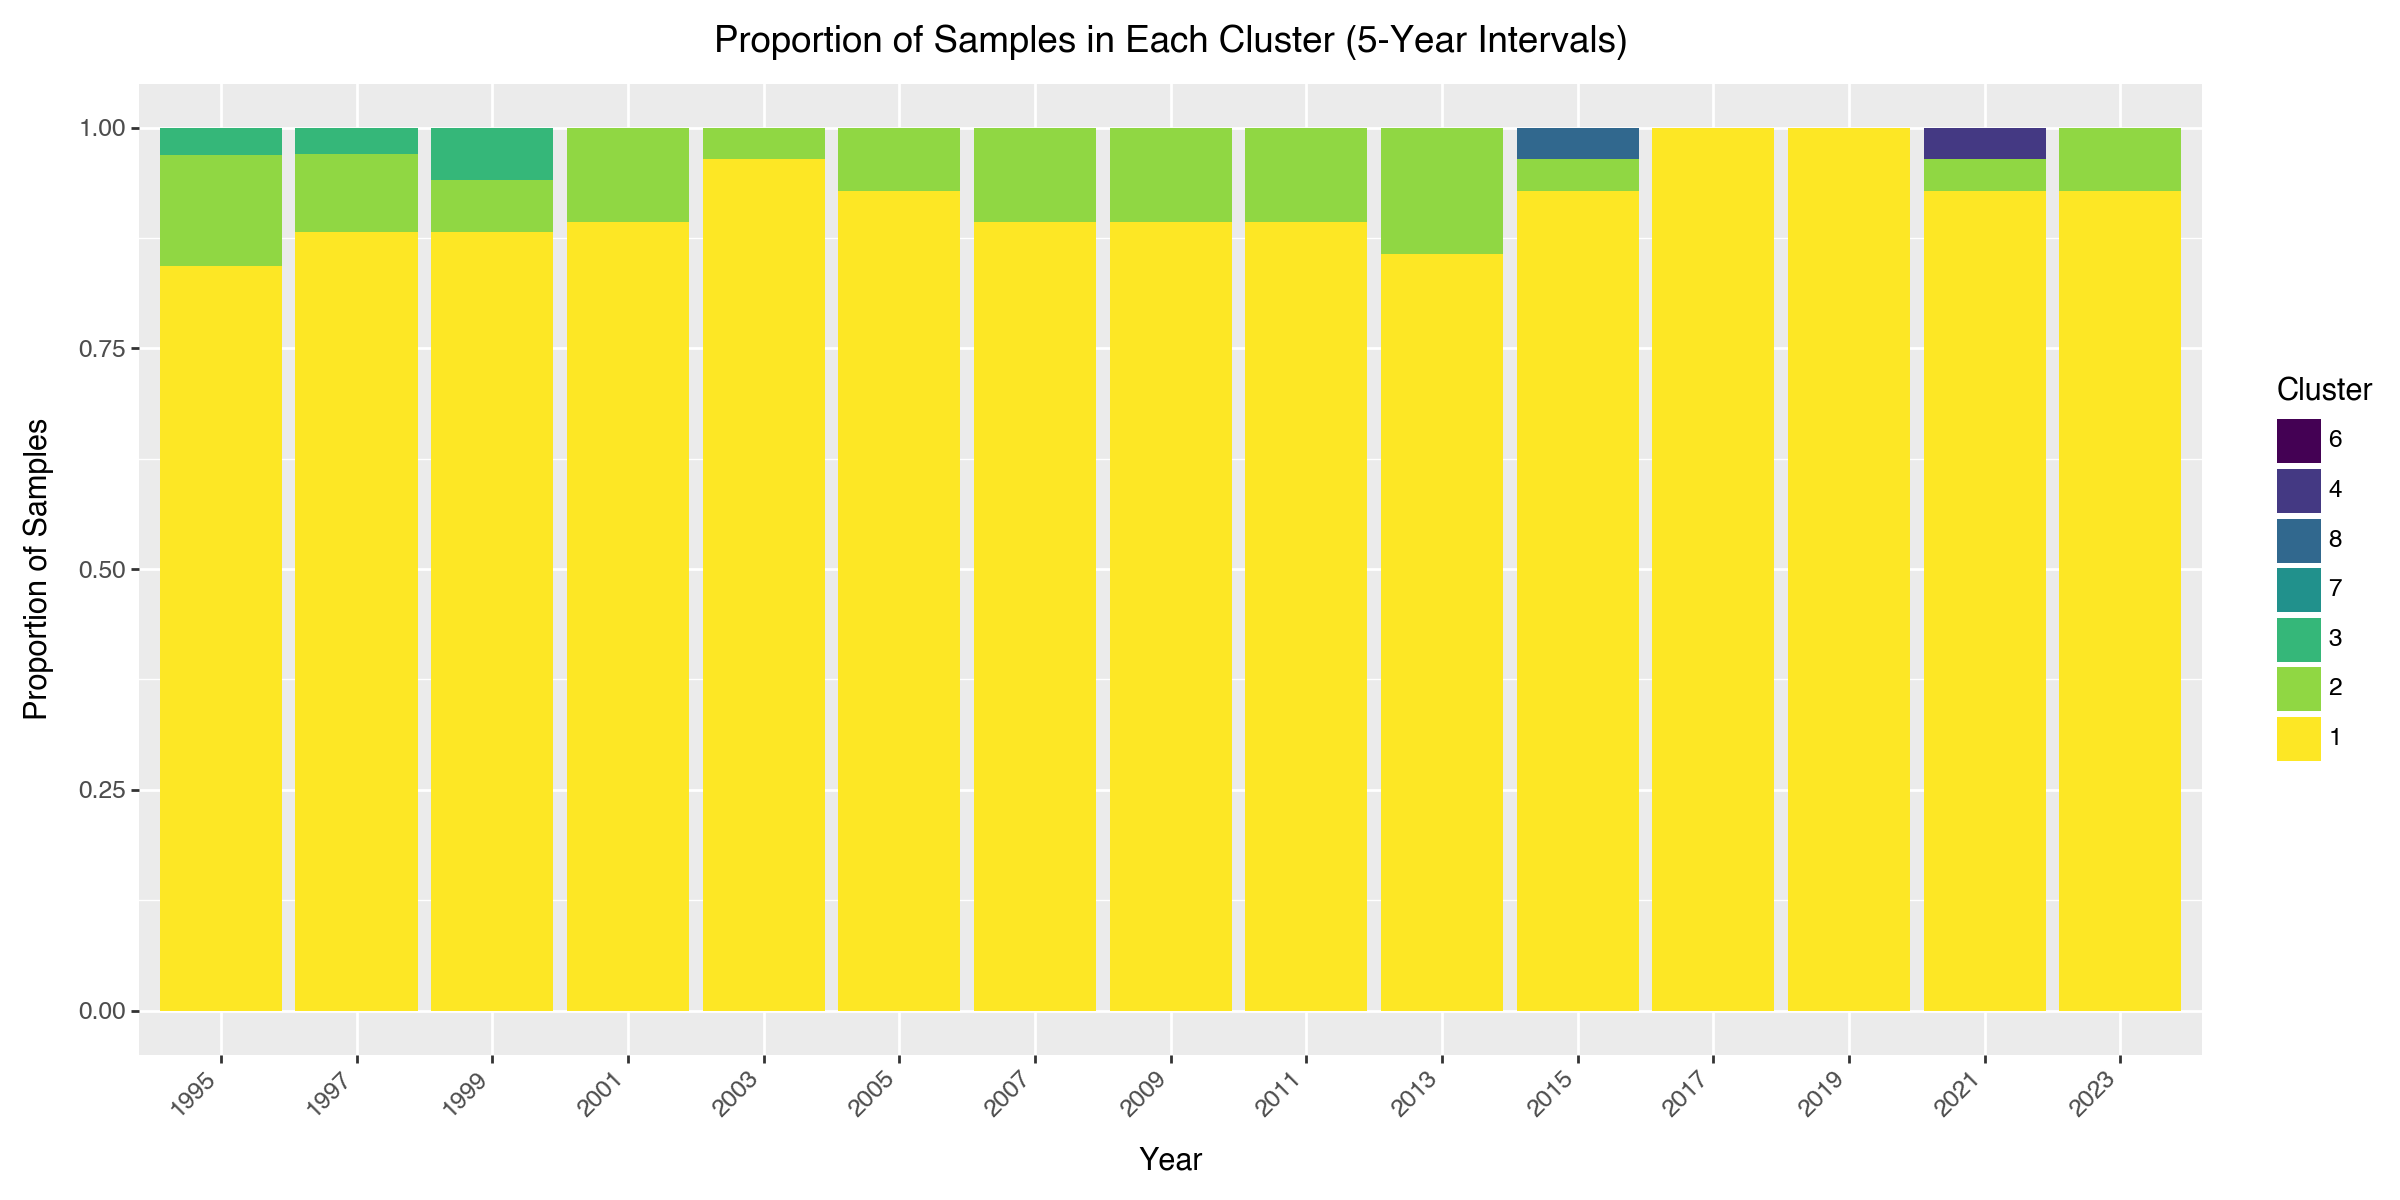

In [25]:
# Prepare data for DFA-style analysis: proportion of samples in each cluster over time by pool
cluster_proportions = df_pool.groupby(['year', 'cluster']).size().reset_index(name='count')

# Calculate total samples per year per pool
totals = cluster_proportions.groupby(['year'])['count'].transform('sum')
cluster_proportions['proportion'] = cluster_proportions['count'] / totals


# Create a filtered dataset for specific years (1995, 2000, 2005, ...)
years_to_plot = list(range(1995, df_pool['year'].max() + 1, 2))

# Filter cluster_proportions for these years
cluster_proportions_filtered = cluster_proportions[cluster_proportions['year'].isin(years_to_plot)]

# Sort clusters by overall proportion (to create consistent ordering)
cluster_order = cluster_proportions.groupby('cluster')['proportion'].sum().sort_values(ascending=True).index.astype(str)

# Ensure cluster is string and convert to categorical with specified order
cluster_proportions_filtered['cluster'] = pd.Categorical(
    cluster_proportions_filtered['cluster'].astype(str),
    categories=cluster_order,
    ordered=True
)

# Create stacked bar plot
(ggplot(cluster_proportions_filtered, aes(x='factor(year)', y='proportion', fill='cluster')) +
 geom_col(position='stack') +
 labs(x='Year', y='Proportion of Samples', fill='Cluster', 
      title='Proportion of Samples in Each Cluster (5-Year Intervals)') +
 theme(figure_size=(12, 6), axis_text_x=element_text(angle=45, hjust=1))
)

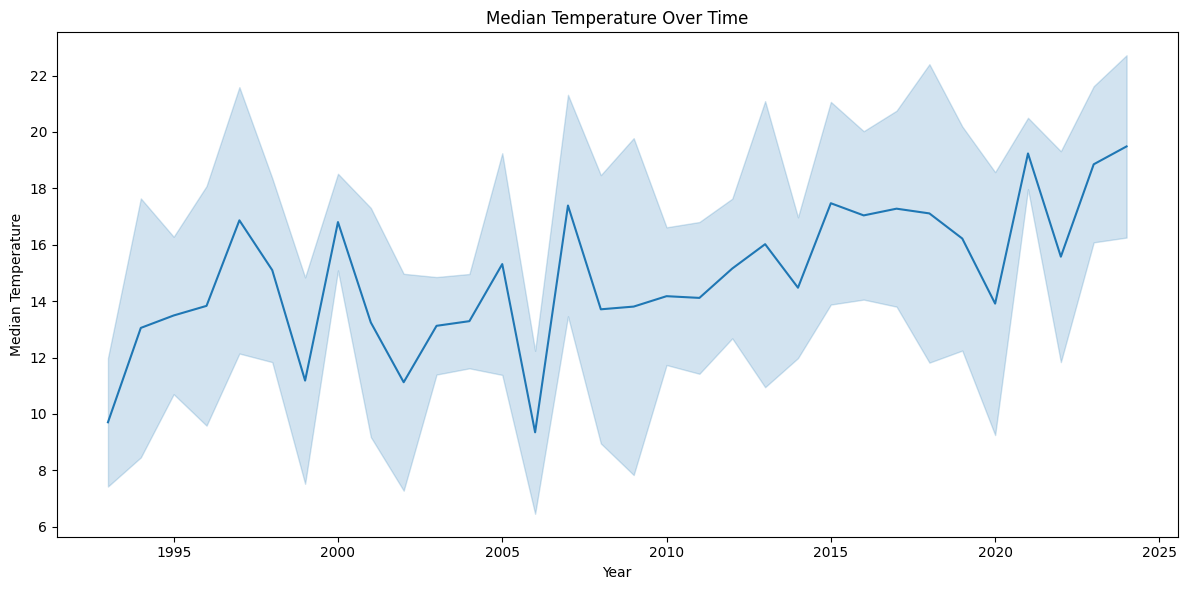

In [144]:
# Plot median temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pool, x='year', y='median_temp', estimator='mean', errorbar='sd')
plt.xlabel('Year')
plt.ylabel('Median Temperature')
plt.title('Median Temperature Over Time')
plt.tight_layout()
plt.show()

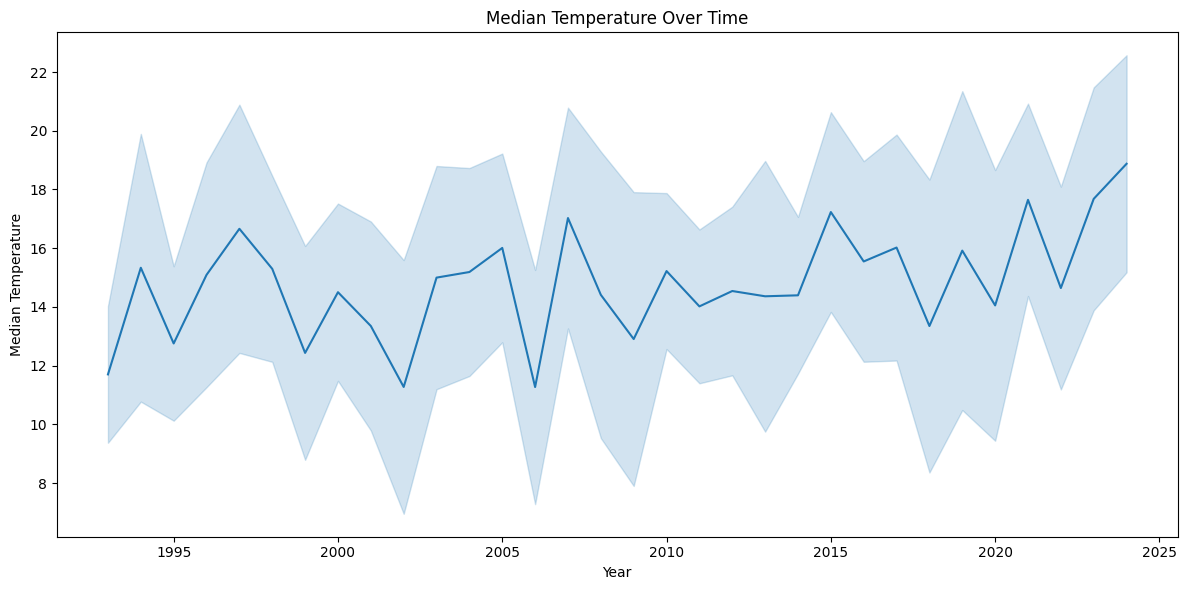

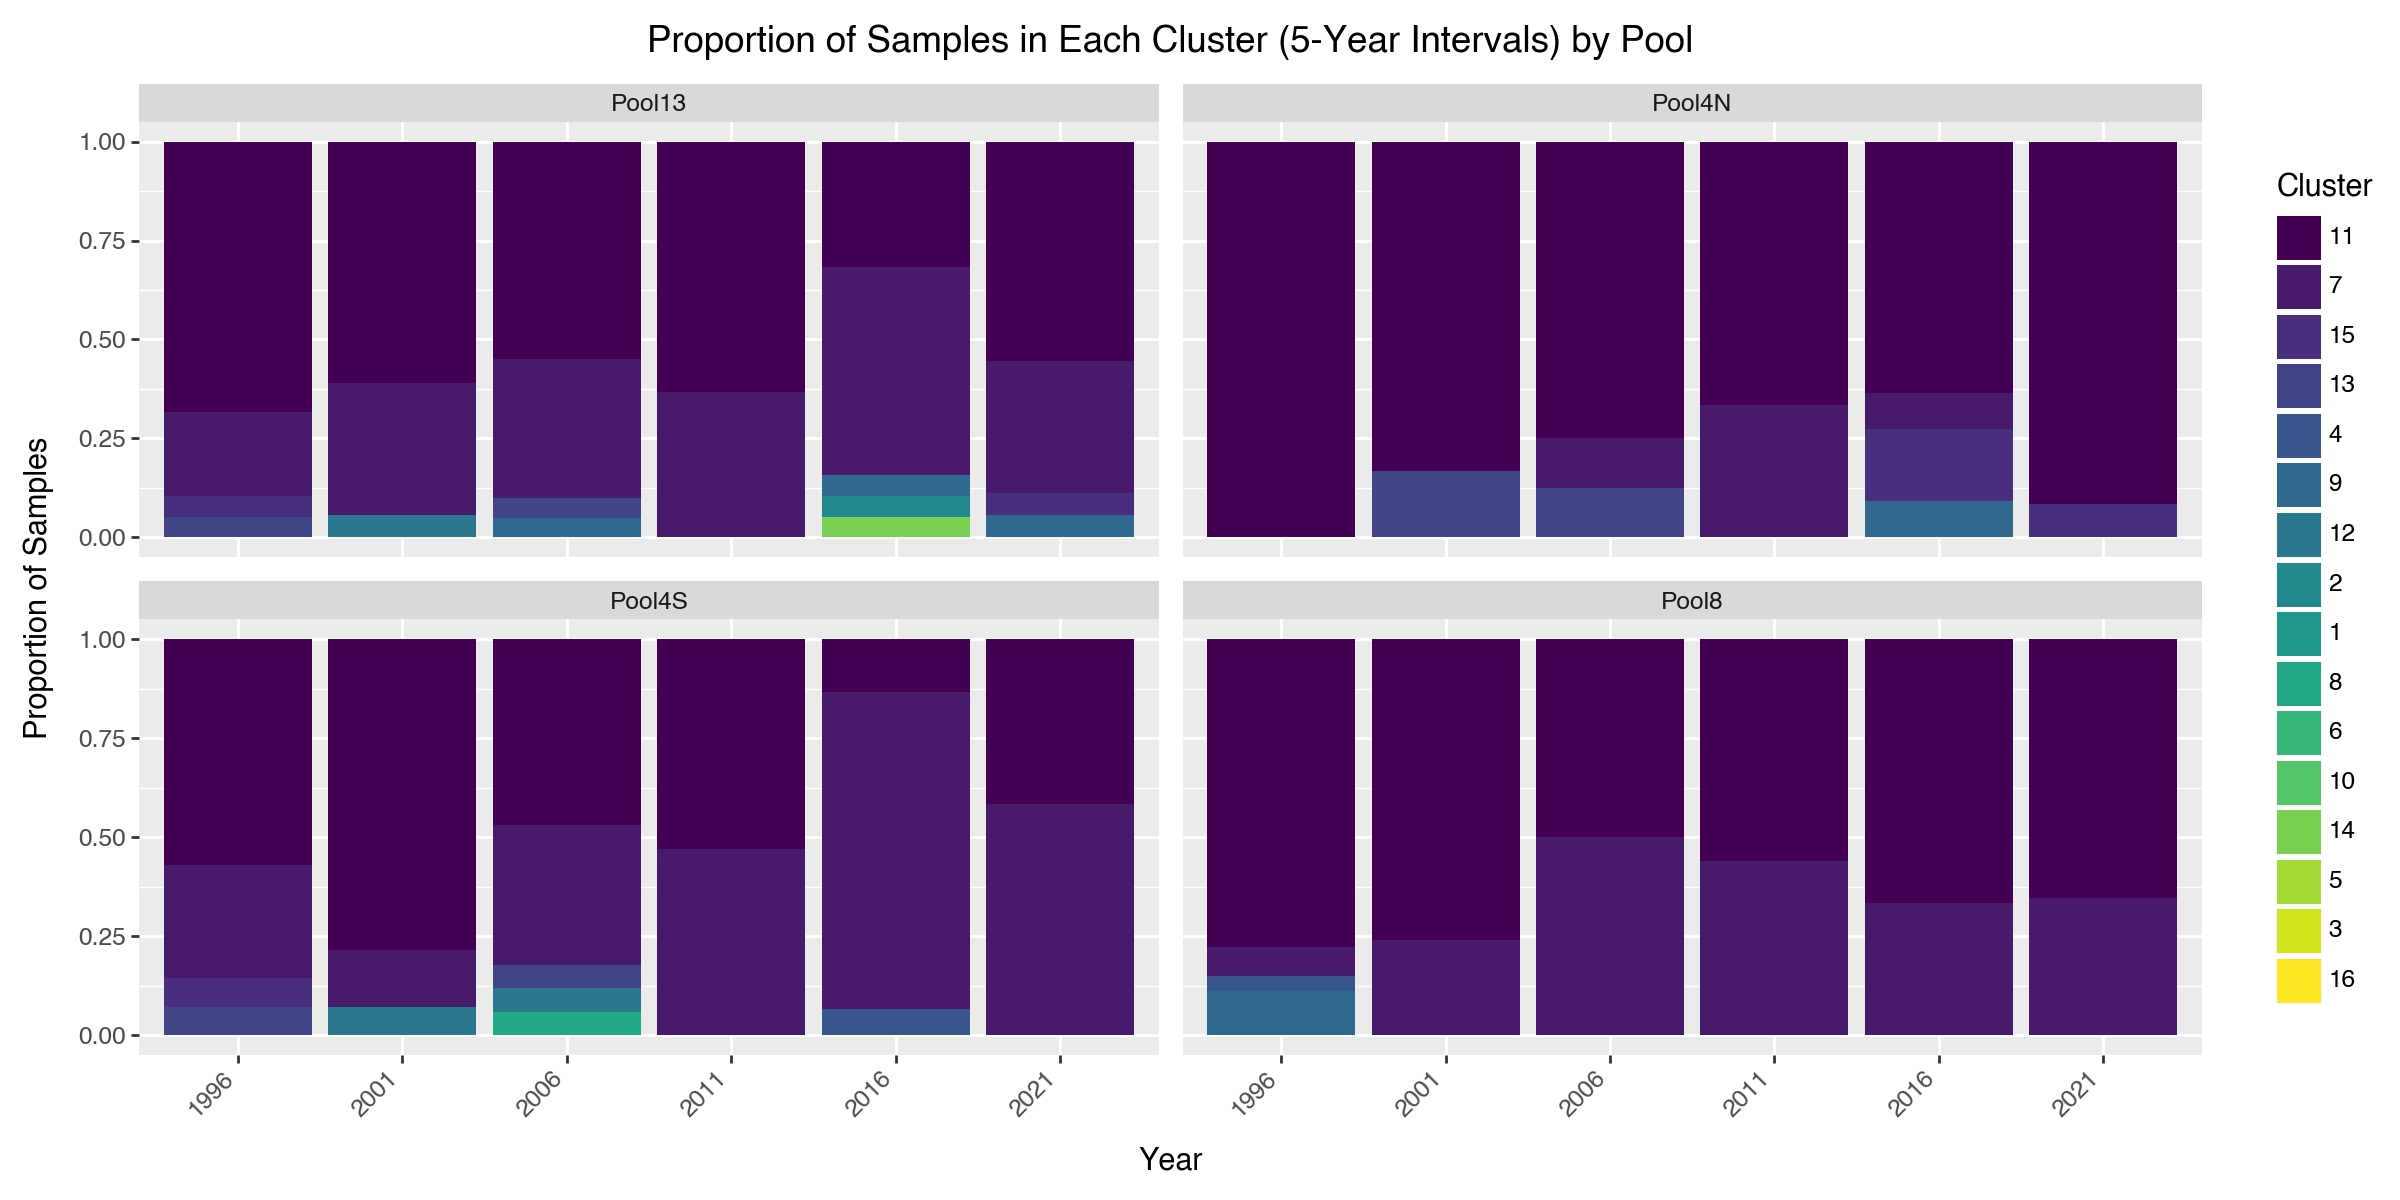

In [122]:
# ...existing code...
# Create a filtered dataset for specific years (1995, 2000, 2005, ...)
years_to_plot = list(range(1996, df_explo['year'].max() + 1, 5))

# Filter cluster_proportions for these years (copy to avoid SettingWithCopy warnings)
cluster_proportions_filtered = (
    cluster_proportions.loc[cluster_proportions['year'].isin(years_to_plot)].copy()
)

# Sort clusters by overall proportion (to create consistent ordering)
cluster_order = (
    cluster_proportions.groupby('cluster')['proportion']
    .sum()
    .sort_values(ascending=False)
    .index.astype(str)
)

# Ensure cluster is string and convert to categorical with specified order
cluster_proportions_filtered['cluster'] = pd.Categorical(
    cluster_proportions_filtered['cluster'].astype(str),
    categories=cluster_order,
    ordered=True
)

# Make year an ordered categorical so bars are chronological
cluster_proportions_filtered['year'] = pd.Categorical(
    cluster_proportions_filtered['year'],
    categories=years_to_plot,
    ordered=True
)

# Create stacked bar plot faceted by pool
from plotnine import *
(ggplot(cluster_proportions_filtered, aes(x='year', y='proportion', fill='cluster')) +
 geom_col(position='stack') +
 facet_wrap('~mode_pool') +
 labs(x='Year', y='Proportion of Samples', fill='Cluster',
      title='Proportion of Samples in Each Cluster (5-Year Intervals) by Pool') +
 theme(figure_size=(12, 6), axis_text_x=element_text(angle=45, hjust=1))
)
# ...existing code...

/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 65 rows containing missing values.


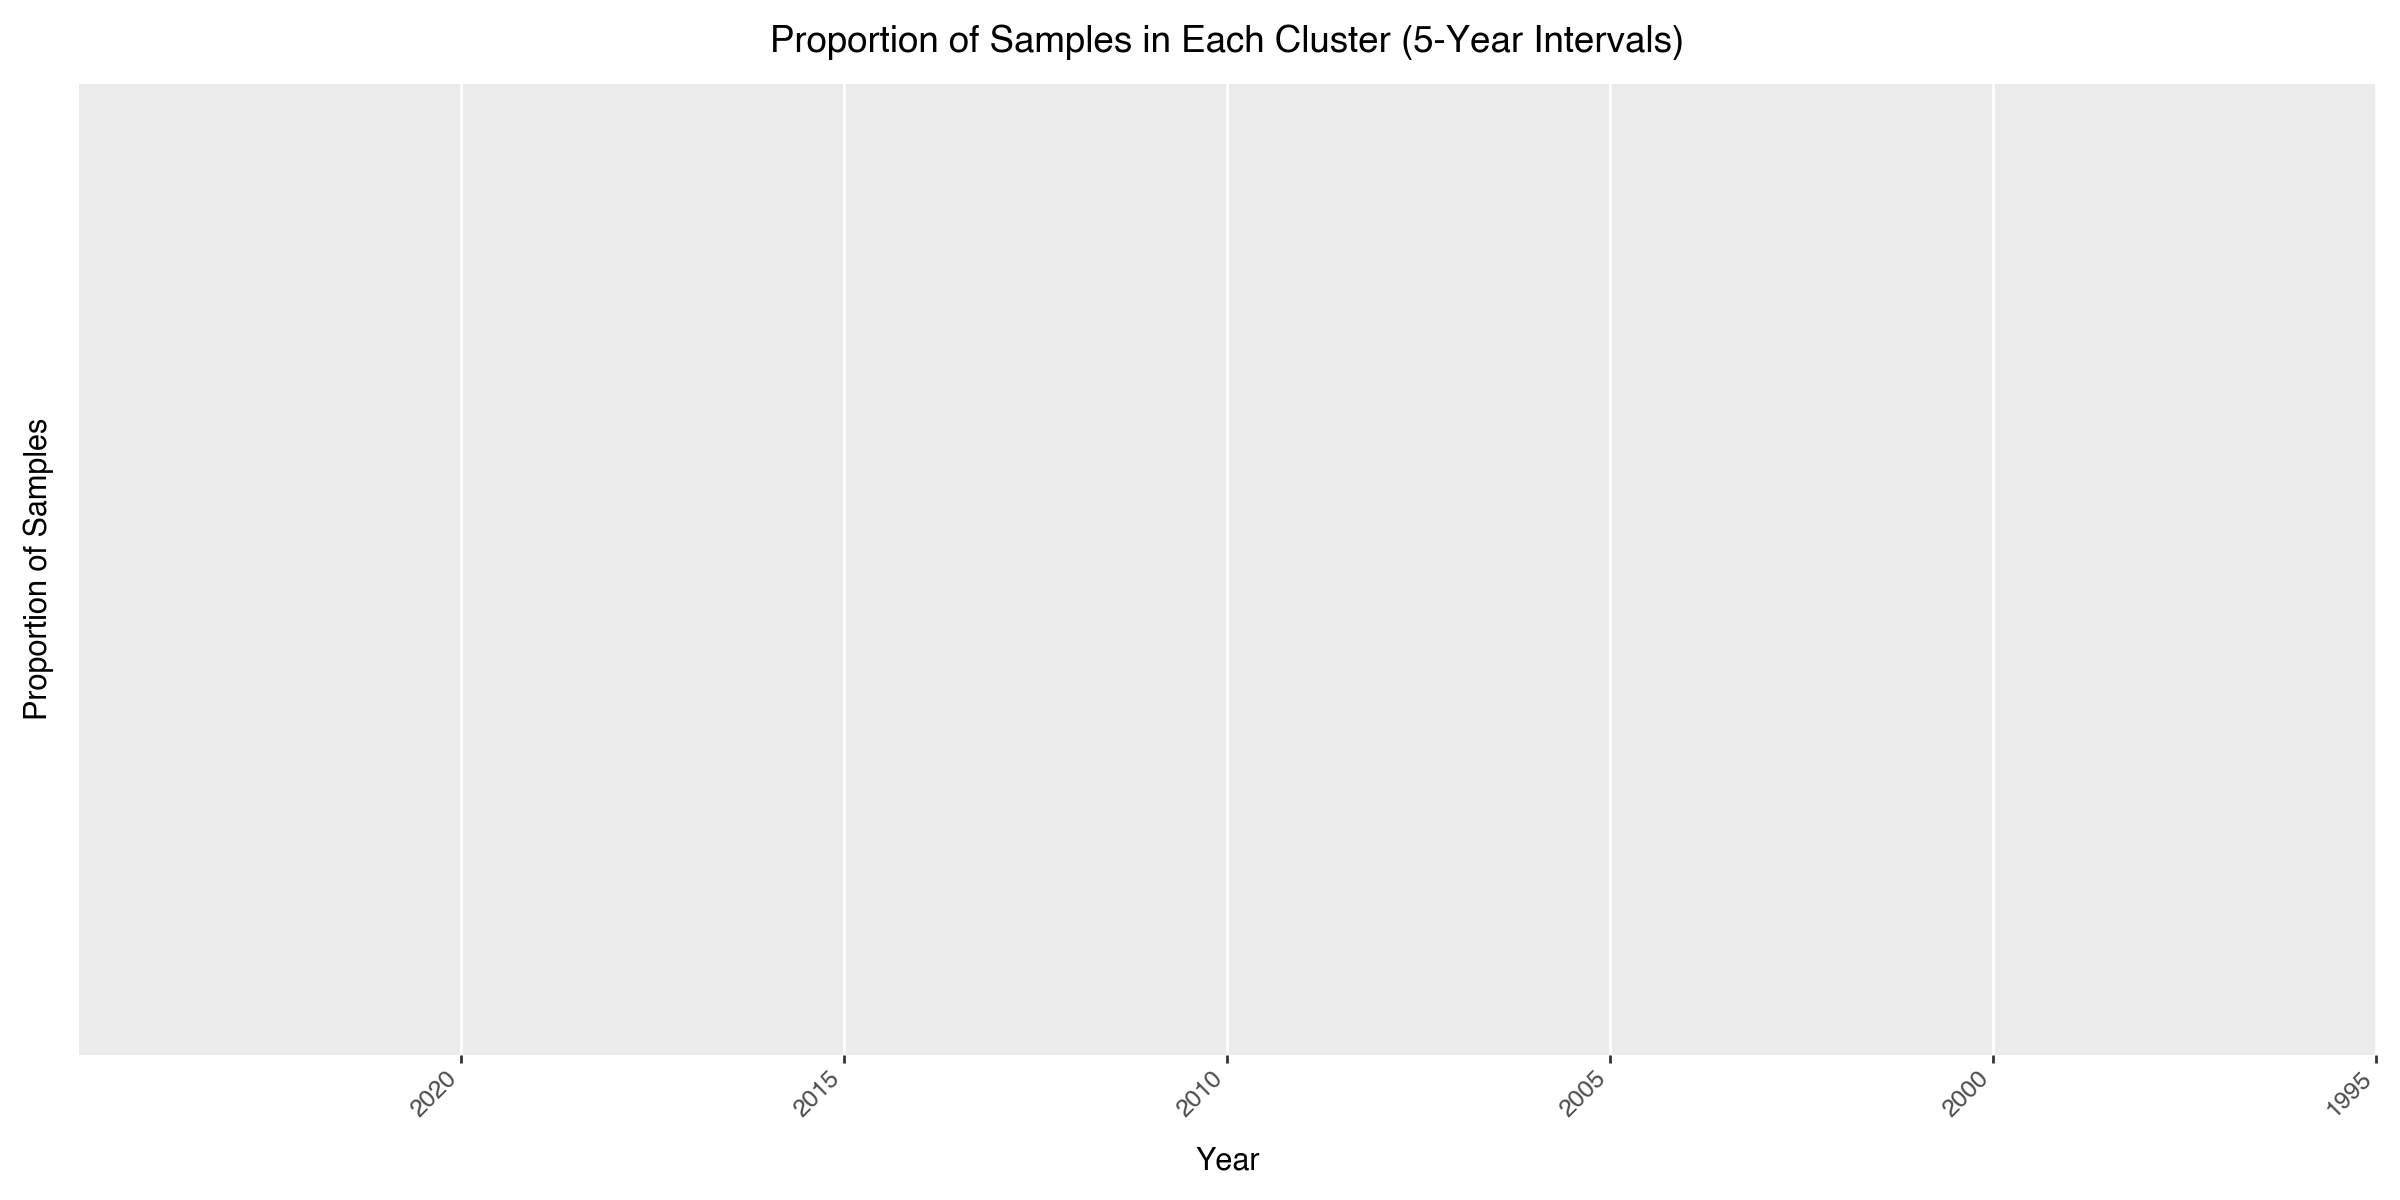

In [121]:
# ...existing code...
# Sort clusters by overall proportion (reverse order)
cluster_order = (
    cluster_proportions.groupby('cluster')['proportion']
    .sum()
    .sort_values(ascending=True)  # was descending
    .index.astype(str)
)

# Ensure cluster is string and convert to categorical with specified order
cluster_proportions_filtered['cluster'] = pd.Categorical(
    cluster_proportions_filtered['cluster'].astype(str),
    categories=cluster_order,
    ordered=True
)

# Create stacked bar plot with reversed x (years) order
from plotnine import *
(ggplot(cluster_proportions_filtered, aes(x='factor(year)', y='proportion', fill='cluster')) +
 geom_col(position='stack') +
 scale_x_discrete(limits=[str(y) for y in years_to_plot[::-1]]) +
 labs(x='Year', y='Proportion of Samples', fill='Cluster',
      title='Proportion of Samples in Each Cluster (5-Year Intervals)') +
 theme(figure_size=(12, 6), axis_text_x=element_text(angle=45, hjust=1))
)
# ...existing code...